In [ ]:
!git clone https://github.com/chrisyu-uiuc/revisit-deepcoxmixtures-cs598-uiuc
#ref : https://github.com/autonlab/auton-survival/blob/master/examples/CV%20Survival%20Regression%20on%20SUPPORT%20Dataset.ipynb

fatal: destination path 'revisit-deepcoxmixtures-cs598-uiuc' already exists and is not an empty directory.


In [ ]:
!cd revisit-deepcoxmixtures-cs598-uiuc && pip install -r requirements.txt

In [ ]:
!cd /content/revisit-deepcoxmixtures-cs598-uiuc/auton_survival/datasets && wget https://github.com/mwmachado/FlchainExploration/raw/refs/heads/master/flchain.csv

--2025-04-24 13:31:47--  https://github.com/mwmachado/FlchainExploration/raw/refs/heads/master/flchain.csv
Resolving github.com (github.com)... 140.82.113.4
Connecting to github.com (github.com)|140.82.113.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/mwmachado/FlchainExploration/refs/heads/master/flchain.csv [following]
--2025-04-24 13:31:48--  https://raw.githubusercontent.com/mwmachado/FlchainExploration/refs/heads/master/flchain.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 386453 (377K) [text/plain]
Saving to: ‘flchain.csv.2’

flchain.csv.2       100%[===================>] 377.40K  --.-KB/s    in 0.05s   

2025-04-24 13:31:48 (7.92 MB/s) - ‘flchain.csv.2’ saved [386453/386453]



In [ ]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("sujithmandala/seer-breast-cancer-data")

print("Path to dataset files:", path)


Path to dataset files: /kaggle/input/seer-breast-cancer-data


In [ ]:
import shutil
source_path = path#r"/root/.cache/kagglehub/datasets/sujithmandala/seer-breast-cancer-data/versions/1/SEER Breast Cancer Dataset .csv"
destination_dir = r"/content/revisit-deepcoxmixtures-cs598-uiuc/auton_survival/datasets"
shutil.move(source_path, destination_dir)

print(f"{source_path} has been moved to {destination_dir}")

import os
import shutil

# Define the source and destination paths
source_path = "/content/revisit-deepcoxmixtures-cs598-uiuc/auton_survival/datasets/1/SEER Breast Cancer Dataset .csv"
destination_path = "/content/revisit-deepcoxmixtures-cs598-uiuc/auton_survival/datasets/SEER Breast Cancer Dataset .csv"

# Check if source file exists
if os.path.exists(source_path):
    # Move the file to the new destination
    shutil.move(source_path, destination_path)
    print(f"File has been moved to: {destination_path}")

    # Remove the "1" directory if empty
    directory_to_remove = "/content/revisit-deepcoxmixtures-cs598-uiuc/auton_survival/datasets/1"
    if os.path.isdir(directory_to_remove) and not os.listdir(directory_to_remove):  # Check if directory is empty
        os.rmdir(directory_to_remove)
        print(f"Directory '{directory_to_remove}' has been removed.")
    else:
        print(f"Directory '{directory_to_remove}' is not empty or does not exist.")
else:
    print("Source file does not exist.")

current_path = "/content/revisit-deepcoxmixtures-cs598-uiuc/auton_survival/datasets/SEER Breast Cancer Dataset .csv"
new_path = "/content/revisit-deepcoxmixtures-cs598-uiuc/auton_survival/datasets/seer.csv"

os.rename(current_path, new_path)
print(f"File has been renamed to: {new_path}")

Error: Destination path '/content/revisit-deepcoxmixtures-cs598-uiuc/auton_survival/datasets/seer-breast-cancer-data' already exists

In [ ]:
import numpy as np
import sys
sys.path.append('/content/revisit-deepcoxmixtures-cs598-uiuc')

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from auton_survival.preprocessing import Preprocessor
import numpy as np

# Load SEER dataset
def load_seer_data(filepath):
    data = pd.read_csv(filepath)
    data = data.rename(columns={
        'Status': 'event',
        'Survival Months': 'time'
    })
    # Convert 'event' to binary: 1 for 'Dead', 0 for 'Alive'
    data['event'] = data['event'].apply(lambda x: 1 if x.lower() == 'dead' else 0)
    return data

filepath = '/content/revisit-deepcoxmixtures-cs598-uiuc/auton_survival/datasets/seer.csv'
seer_data = load_seer_data(filepath)

# Define categorical and numerical features specific to SEER dataset
cat_feats = ['Race ', 'Marital Status', 'T Stage ', 'N Stage', '6th Stage', 'Grade', 'Estrogen Status', 'Progesterone Status']
num_feats = ['Age', 'Tumor Size', 'Regional Node Examined', 'Reginol Node Positive']

features = seer_data[cat_feats + num_feats]
outcomes = seer_data[['event', 'time']]

# Split into training (60%), validation (20%), and test (20%)
x_tr, x_te, y_tr, y_te = train_test_split(features, outcomes, test_size=0.2, random_state=1)
x_tr, x_val, y_tr, y_val = train_test_split(x_tr, y_tr, test_size=0.25, random_state=1)  # 0.25 * 0.8 = 0.2

# Fit the preprocessor
preprocessor = Preprocessor(cat_feat_strat='ignore', num_feat_strat='mean')
transformer = preprocessor.fit(features, cat_feats=cat_feats, num_feats=num_feats, one_hot=True, fill_value=-1)

# Transform the training, validation, and test datasets
x_tr = transformer.transform(x_tr)
x_val = transformer.transform(x_val)
x_te = transformer.transform(x_te)

# Calculate the quartiles of survival times
times = np.quantile(y_tr['time'], [0.25, 0.5, 0.75]).tolist()

# Output transformed datasets
print("Training features (x_tr):", x_tr.shape)
print("Validation features (x_val):", x_val.shape)
print("Test features (x_te):", x_te.shape)

Training features (x_tr): (2414, 24)
Validation features (x_val): (805, 24)
Test features (x_te): (805, 24)


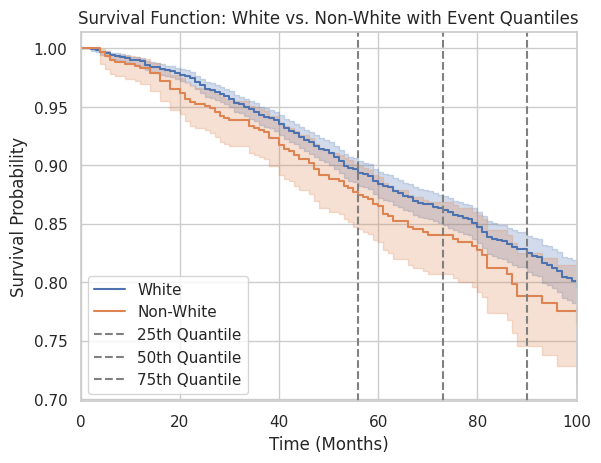

In [ ]:
#Figure 2

from lifelines import KaplanMeierFitter
import matplotlib.pyplot as plt

# Create a new column for White vs. Non-White classification
seer_data['Race_Group'] = seer_data['Race '].apply(lambda x: 'White' if x == 'White' else 'Non-White')

# Initialize the Kaplan-Meier estimator
kmf = KaplanMeierFitter()

# Plot survival function for White group
group_white = seer_data[seer_data['Race_Group'] == 'White']
kmf.fit(durations=group_white['time'], event_observed=group_white['event'], label='White')
kmf.plot_survival_function()

# Plot survival function for Non-White group
group_non_white = seer_data[seer_data['Race_Group'] == 'Non-White']
kmf.fit(durations=group_non_white['time'], event_observed=group_non_white['event'], label='Non-White')
kmf.plot_survival_function()

# Add quantiles as vertical dashed lines
quantiles = [0.25, 0.50, 0.75]
for q in quantiles:
    plt.axvline(x=seer_data['time'].quantile(q), color='grey', linestyle='--', label=f'{int(q*100)}th Quantile')

# Set x-axis limit
plt.xlim(0, 100)

# Add title, labels, and legend
plt.title('Survival Function: White vs. Non-White with Event Quantiles')
plt.xlabel('Time (Months)')
plt.ylabel('Survival Probability')
plt.legend()
plt.show()

In [ ]:
# Create a mask for white individuals
white_mask = features['Race '] == 'White'  # Adjust 'White' based on the actual encoding in your dataset

# Filter the dataset for white individuals
features_white = features[white_mask]
outcomes_white = outcomes[white_mask]

# Split the white dataset into training, validation, and test data
x_tr_non_white, x_te_non_white, y_tr_non_white, y_te_non_white = train_test_split(features_white, outcomes_white, test_size=0.2, random_state=1)
x_tr_non_white, x_val_non_white, y_tr_non_white, y_val_non_white = train_test_split(x_tr_non_white, y_tr_non_white, test_size=0.25, random_state=1)  # 0.25 * 0.8 = 0.2

# Fit the imputer and scaler to the training data and transform the training, validation, and test data
white_transformer = preprocessor.fit(features_white, cat_feats=cat_feats, num_feats=num_feats, one_hot=True, fill_value=-1)
x_tr_non_white = white_transformer.transform(x_tr_non_white)
x_val_non_white = white_transformer.transform(x_val_non_white)
x_te_non_white = white_transformer.transform(x_te_non_white)

# Output transformed datasets
print("Training features (White):", x_tr_non_white.shape)
print("Validation features (White):", x_val_non_white.shape)
print("Test features (White):", x_te_non_white.shape)

Training features (White): (2047, 22)
Validation features (White): (683, 22)
Test features (White): (683, 22)


In [ ]:
import numpy as np
from auton_survival.experiments import SurvivalRegressionCV

param_grid = {'l2' : [1e-3, 1e-2,1e-1]}

#times = np.quantile(y_tr.time[y_tr.event==1], [0.25, 0.5, 0.75]).tolist()
cph_experiment = SurvivalRegressionCV(model='cph', num_folds=5, hyperparam_grid=param_grid, random_seed=7)
cph_model = cph_experiment.fit(x_tr.astype(np.float64), y_tr.astype(np.float64), times, metric='brs')

#times = np.quantile(y_tr_non_white.time[y_tr_non_white.event==1], [0.25, 0.5, 0.75]).tolist()
cph_non_white_experiment = SurvivalRegressionCV(model='cph', num_folds=5, hyperparam_grid=param_grid, random_seed=7)
cph_non_white_model = cph_non_white_experiment.fit(x_tr_non_white.astype(np.float64), y_tr_non_white.astype(np.float64), times, metric='brs')


At hyper-param {'l2': 0.001}
At fold: 0
At fold: 1
At fold: 2
At fold: 3
At fold: 4
At hyper-param {'l2': 0.01}
At fold: 0
At fold: 1
At fold: 2
At fold: 3
At fold: 4
At hyper-param {'l2': 0.1}
At fold: 0
At fold: 1
At fold: 2
At fold: 3
At fold: 4
At hyper-param {'l2': 0.001}
At fold: 0
At fold: 1
At fold: 2
At fold: 3
At fold: 4
At hyper-param {'l2': 0.01}
At fold: 0
At fold: 1
At fold: 2
At fold: 3
At fold: 4
At hyper-param {'l2': 0.1}
At fold: 0
At fold: 1
At fold: 2
At fold: 3
At fold: 4


In [ ]:
param_grid = {
    'k': [3, 4, 6],  # Number of mixture components K
    'layers': [[50, 100]],  # Units in each hidden layer
    'batch_size': [128],  # Mini-batch size (fixed)
    'lr': [1e-3],  # Learning rate (fixed)
}


dcm_experiment = SurvivalRegressionCV(model='dcm', num_folds=5, hyperparam_grid=param_grid, random_seed=7)
dcm_model = dcm_experiment.fit(x_tr.astype(np.float64), y_tr.astype(np.float64), times, metric='brs')

dcm_non_male_experiment = SurvivalRegressionCV(model='dcm', num_folds=5, hyperparam_grid=param_grid, random_seed=7)
dcm_non_white_model = dcm_non_male_experiment.fit(x_tr_non_white.astype(np.float64), y_tr_non_white.astype(np.float64), times, metric='brs')

At hyper-param {'batch_size': 128, 'k': 3, 'layers': [50, 100], 'lr': 0.001}
At fold: 0


 62%|██████▏   | 31/50 [00:04<00:02,  7.11it/s]
/content/revisit-deepcoxmixtures-cs598-uiuc/auton_survival/estimators.py:206: FutureWarning: DataFrame.interpolate with method=bfill is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  return survival_predictions.sort_index(axis=0).interpolate().interpolate(method='bfill').T[times].values


At fold: 1


 86%|████████▌ | 43/50 [00:06<00:01,  6.88it/s]
/content/revisit-deepcoxmixtures-cs598-uiuc/auton_survival/estimators.py:206: FutureWarning: DataFrame.interpolate with method=bfill is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  return survival_predictions.sort_index(axis=0).interpolate().interpolate(method='bfill').T[times].values


At fold: 2


 36%|███▌      | 18/50 [00:03<00:05,  5.83it/s]
/content/revisit-deepcoxmixtures-cs598-uiuc/auton_survival/estimators.py:206: FutureWarning: DataFrame.interpolate with method=bfill is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  return survival_predictions.sort_index(axis=0).interpolate().interpolate(method='bfill').T[times].values


At fold: 3


 30%|███       | 15/50 [00:02<00:05,  6.77it/s]
/content/revisit-deepcoxmixtures-cs598-uiuc/auton_survival/estimators.py:206: FutureWarning: DataFrame.interpolate with method=bfill is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  return survival_predictions.sort_index(axis=0).interpolate().interpolate(method='bfill').T[times].values


At fold: 4


 66%|██████▌   | 33/50 [00:04<00:02,  7.11it/s]
/content/revisit-deepcoxmixtures-cs598-uiuc/auton_survival/estimators.py:206: FutureWarning: DataFrame.interpolate with method=bfill is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  return survival_predictions.sort_index(axis=0).interpolate().interpolate(method='bfill').T[times].values


At hyper-param {'batch_size': 128, 'k': 4, 'layers': [50, 100], 'lr': 0.001}
At fold: 0


 72%|███████▏  | 36/50 [00:06<00:02,  5.64it/s]
/content/revisit-deepcoxmixtures-cs598-uiuc/auton_survival/estimators.py:206: FutureWarning: DataFrame.interpolate with method=bfill is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  return survival_predictions.sort_index(axis=0).interpolate().interpolate(method='bfill').T[times].values


At fold: 1


 56%|█████▌    | 28/50 [00:04<00:03,  6.36it/s]
/content/revisit-deepcoxmixtures-cs598-uiuc/auton_survival/estimators.py:206: FutureWarning: DataFrame.interpolate with method=bfill is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  return survival_predictions.sort_index(axis=0).interpolate().interpolate(method='bfill').T[times].values


At fold: 2


 46%|████▌     | 23/50 [00:03<00:04,  6.04it/s]
/content/revisit-deepcoxmixtures-cs598-uiuc/auton_survival/estimators.py:206: FutureWarning: DataFrame.interpolate with method=bfill is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  return survival_predictions.sort_index(axis=0).interpolate().interpolate(method='bfill').T[times].values


At fold: 3


100%|██████████| 50/50 [00:08<00:00,  5.87it/s]
/content/revisit-deepcoxmixtures-cs598-uiuc/auton_survival/estimators.py:206: FutureWarning: DataFrame.interpolate with method=bfill is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  return survival_predictions.sort_index(axis=0).interpolate().interpolate(method='bfill').T[times].values


At fold: 4


 24%|██▍       | 12/50 [00:02<00:08,  4.66it/s]
/content/revisit-deepcoxmixtures-cs598-uiuc/auton_survival/estimators.py:206: FutureWarning: DataFrame.interpolate with method=bfill is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  return survival_predictions.sort_index(axis=0).interpolate().interpolate(method='bfill').T[times].values


At hyper-param {'batch_size': 128, 'k': 6, 'layers': [50, 100], 'lr': 0.001}
At fold: 0


 42%|████▏     | 21/50 [00:04<00:06,  4.24it/s]
/content/revisit-deepcoxmixtures-cs598-uiuc/auton_survival/estimators.py:206: FutureWarning: DataFrame.interpolate with method=bfill is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  return survival_predictions.sort_index(axis=0).interpolate().interpolate(method='bfill').T[times].values


At fold: 1


 34%|███▍      | 17/50 [00:03<00:06,  4.90it/s]
/content/revisit-deepcoxmixtures-cs598-uiuc/auton_survival/estimators.py:206: FutureWarning: DataFrame.interpolate with method=bfill is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  return survival_predictions.sort_index(axis=0).interpolate().interpolate(method='bfill').T[times].values


At fold: 2


 46%|████▌     | 23/50 [00:04<00:05,  4.77it/s]
/content/revisit-deepcoxmixtures-cs598-uiuc/auton_survival/estimators.py:206: FutureWarning: DataFrame.interpolate with method=bfill is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  return survival_predictions.sort_index(axis=0).interpolate().interpolate(method='bfill').T[times].values


At fold: 3


 46%|████▌     | 23/50 [00:06<00:07,  3.79it/s]
/content/revisit-deepcoxmixtures-cs598-uiuc/auton_survival/estimators.py:206: FutureWarning: DataFrame.interpolate with method=bfill is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  return survival_predictions.sort_index(axis=0).interpolate().interpolate(method='bfill').T[times].values


At fold: 4


 60%|██████    | 30/50 [00:05<00:03,  5.12it/s]
/content/revisit-deepcoxmixtures-cs598-uiuc/auton_survival/estimators.py:206: FutureWarning: DataFrame.interpolate with method=bfill is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  return survival_predictions.sort_index(axis=0).interpolate().interpolate(method='bfill').T[times].values
 44%|████▍     | 22/50 [00:05<00:07,  3.72it/s]


At hyper-param {'batch_size': 128, 'k': 3, 'layers': [50, 100], 'lr': 0.001}
At fold: 0


 42%|████▏     | 21/50 [00:02<00:03,  8.07it/s]
/content/revisit-deepcoxmixtures-cs598-uiuc/auton_survival/estimators.py:206: FutureWarning: DataFrame.interpolate with method=bfill is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  return survival_predictions.sort_index(axis=0).interpolate().interpolate(method='bfill').T[times].values


At fold: 1


100%|██████████| 50/50 [00:05<00:00,  8.61it/s]
/content/revisit-deepcoxmixtures-cs598-uiuc/auton_survival/estimators.py:206: FutureWarning: DataFrame.interpolate with method=bfill is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  return survival_predictions.sort_index(axis=0).interpolate().interpolate(method='bfill').T[times].values


At fold: 2


 64%|██████▍   | 32/50 [00:04<00:02,  6.98it/s]
/content/revisit-deepcoxmixtures-cs598-uiuc/auton_survival/estimators.py:206: FutureWarning: DataFrame.interpolate with method=bfill is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  return survival_predictions.sort_index(axis=0).interpolate().interpolate(method='bfill').T[times].values


At fold: 3


 60%|██████    | 30/50 [00:03<00:02,  8.45it/s]
/content/revisit-deepcoxmixtures-cs598-uiuc/auton_survival/estimators.py:206: FutureWarning: DataFrame.interpolate with method=bfill is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  return survival_predictions.sort_index(axis=0).interpolate().interpolate(method='bfill').T[times].values


At fold: 4


 42%|████▏     | 21/50 [00:02<00:03,  8.28it/s]
/content/revisit-deepcoxmixtures-cs598-uiuc/auton_survival/estimators.py:206: FutureWarning: DataFrame.interpolate with method=bfill is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  return survival_predictions.sort_index(axis=0).interpolate().interpolate(method='bfill').T[times].values


At hyper-param {'batch_size': 128, 'k': 4, 'layers': [50, 100], 'lr': 0.001}
At fold: 0


 56%|█████▌    | 28/50 [00:04<00:03,  6.21it/s]
/content/revisit-deepcoxmixtures-cs598-uiuc/auton_survival/estimators.py:206: FutureWarning: DataFrame.interpolate with method=bfill is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  return survival_predictions.sort_index(axis=0).interpolate().interpolate(method='bfill').T[times].values


At fold: 1


 46%|████▌     | 23/50 [00:03<00:03,  7.39it/s]
/content/revisit-deepcoxmixtures-cs598-uiuc/auton_survival/estimators.py:206: FutureWarning: DataFrame.interpolate with method=bfill is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  return survival_predictions.sort_index(axis=0).interpolate().interpolate(method='bfill').T[times].values


At fold: 2


 68%|██████▊   | 34/50 [00:04<00:02,  7.33it/s]
/content/revisit-deepcoxmixtures-cs598-uiuc/auton_survival/estimators.py:206: FutureWarning: DataFrame.interpolate with method=bfill is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  return survival_predictions.sort_index(axis=0).interpolate().interpolate(method='bfill').T[times].values


At fold: 3


 68%|██████▊   | 34/50 [00:05<00:02,  6.33it/s]
/content/revisit-deepcoxmixtures-cs598-uiuc/auton_survival/estimators.py:206: FutureWarning: DataFrame.interpolate with method=bfill is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  return survival_predictions.sort_index(axis=0).interpolate().interpolate(method='bfill').T[times].values


At fold: 4


 38%|███▊      | 19/50 [00:02<00:04,  7.34it/s]
/content/revisit-deepcoxmixtures-cs598-uiuc/auton_survival/estimators.py:206: FutureWarning: DataFrame.interpolate with method=bfill is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  return survival_predictions.sort_index(axis=0).interpolate().interpolate(method='bfill').T[times].values


At hyper-param {'batch_size': 128, 'k': 6, 'layers': [50, 100], 'lr': 0.001}
At fold: 0


 64%|██████▍   | 32/50 [00:05<00:03,  5.99it/s]
/content/revisit-deepcoxmixtures-cs598-uiuc/auton_survival/estimators.py:206: FutureWarning: DataFrame.interpolate with method=bfill is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  return survival_predictions.sort_index(axis=0).interpolate().interpolate(method='bfill').T[times].values


At fold: 1


 52%|█████▏    | 26/50 [00:05<00:04,  5.09it/s]
/content/revisit-deepcoxmixtures-cs598-uiuc/auton_survival/estimators.py:206: FutureWarning: DataFrame.interpolate with method=bfill is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  return survival_predictions.sort_index(axis=0).interpolate().interpolate(method='bfill').T[times].values


At fold: 2


 46%|████▌     | 23/50 [00:03<00:04,  5.89it/s]
/content/revisit-deepcoxmixtures-cs598-uiuc/auton_survival/estimators.py:206: FutureWarning: DataFrame.interpolate with method=bfill is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  return survival_predictions.sort_index(axis=0).interpolate().interpolate(method='bfill').T[times].values


At fold: 3


100%|██████████| 50/50 [00:08<00:00,  5.63it/s]
/content/revisit-deepcoxmixtures-cs598-uiuc/auton_survival/estimators.py:206: FutureWarning: DataFrame.interpolate with method=bfill is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  return survival_predictions.sort_index(axis=0).interpolate().interpolate(method='bfill').T[times].values


At fold: 4


 26%|██▌       | 13/50 [00:02<00:06,  5.80it/s]
/content/revisit-deepcoxmixtures-cs598-uiuc/auton_survival/estimators.py:206: FutureWarning: DataFrame.interpolate with method=bfill is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  return survival_predictions.sort_index(axis=0).interpolate().interpolate(method='bfill').T[times].values
 32%|███▏      | 16/50 [00:02<00:05,  6.13it/s]


In [ ]:
param_grid = {'k' : [3, 4],
              'distribution' : ['Weibull'],
              'lr' : [1e-4, 1e-3],
              'batch_size': [128,256],  # Mini-batch size (fixed)
              'layers' : [[50,100]]}
#No. of Hidden Layers { ‘0’, ‘1’, ‘2’ }
#Activation { ‘SeLU’ }

#times = np.quantile(y_tr.time[y_tr.event==1], [0.25, 0.5, 0.75]).tolist()
dsm_experiment = SurvivalRegressionCV(model='dsm', num_folds=5, hyperparam_grid=param_grid, random_seed=0)
dsm_model = dsm_experiment.fit(x_tr.astype(np.float64), y_tr.astype(np.float64), times, metric='brs')

#times = np.quantile(y_tr_non_white.time[y_tr_non_white.event==1], [0.25, 0.5, 0.75]).tolist()
dsm_non_white_experiment = SurvivalRegressionCV(model='dsm', num_folds=5, hyperparam_grid=param_grid, random_seed=0)
dsm_non_white_model = dsm_non_white_experiment.fit(x_tr_non_white.astype(np.float64), y_tr_non_white.astype(np.float64), times, metric='brs')

At hyper-param {'batch_size': 128, 'distribution': 'Weibull', 'k': 3, 'layers': [50, 100], 'lr': 0.0001}
At fold: 0


100%|██████████| 50/50 [00:04<00:00, 11.22it/s]
/content/revisit-deepcoxmixtures-cs598-uiuc/auton_survival/estimators.py:206: FutureWarning: DataFrame.interpolate with method=bfill is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  return survival_predictions.sort_index(axis=0).interpolate().interpolate(method='bfill').T[times].values


At fold: 1


100%|██████████| 50/50 [00:05<00:00,  9.80it/s]
/content/revisit-deepcoxmixtures-cs598-uiuc/auton_survival/estimators.py:206: FutureWarning: DataFrame.interpolate with method=bfill is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  return survival_predictions.sort_index(axis=0).interpolate().interpolate(method='bfill').T[times].values


At fold: 2


100%|██████████| 50/50 [00:04<00:00, 11.82it/s]
/content/revisit-deepcoxmixtures-cs598-uiuc/auton_survival/estimators.py:206: FutureWarning: DataFrame.interpolate with method=bfill is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  return survival_predictions.sort_index(axis=0).interpolate().interpolate(method='bfill').T[times].values


At fold: 3


100%|██████████| 50/50 [00:04<00:00, 11.98it/s]
/content/revisit-deepcoxmixtures-cs598-uiuc/auton_survival/estimators.py:206: FutureWarning: DataFrame.interpolate with method=bfill is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  return survival_predictions.sort_index(axis=0).interpolate().interpolate(method='bfill').T[times].values


At fold: 4


100%|██████████| 50/50 [00:04<00:00, 10.80it/s]
/content/revisit-deepcoxmixtures-cs598-uiuc/auton_survival/estimators.py:206: FutureWarning: DataFrame.interpolate with method=bfill is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  return survival_predictions.sort_index(axis=0).interpolate().interpolate(method='bfill').T[times].values


At hyper-param {'batch_size': 128, 'distribution': 'Weibull', 'k': 3, 'layers': [50, 100], 'lr': 0.001}
At fold: 0


100%|██████████| 50/50 [00:04<00:00, 10.03it/s]
/content/revisit-deepcoxmixtures-cs598-uiuc/auton_survival/estimators.py:206: FutureWarning: DataFrame.interpolate with method=bfill is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  return survival_predictions.sort_index(axis=0).interpolate().interpolate(method='bfill').T[times].values


At fold: 1


100%|██████████| 50/50 [00:04<00:00, 11.89it/s]
/content/revisit-deepcoxmixtures-cs598-uiuc/auton_survival/estimators.py:206: FutureWarning: DataFrame.interpolate with method=bfill is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  return survival_predictions.sort_index(axis=0).interpolate().interpolate(method='bfill').T[times].values


At fold: 2


100%|██████████| 50/50 [00:04<00:00, 11.89it/s]
/content/revisit-deepcoxmixtures-cs598-uiuc/auton_survival/estimators.py:206: FutureWarning: DataFrame.interpolate with method=bfill is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  return survival_predictions.sort_index(axis=0).interpolate().interpolate(method='bfill').T[times].values


At fold: 3


100%|██████████| 50/50 [00:04<00:00, 10.73it/s]
/content/revisit-deepcoxmixtures-cs598-uiuc/auton_survival/estimators.py:206: FutureWarning: DataFrame.interpolate with method=bfill is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  return survival_predictions.sort_index(axis=0).interpolate().interpolate(method='bfill').T[times].values


At fold: 4


100%|██████████| 50/50 [00:05<00:00,  9.63it/s]
/content/revisit-deepcoxmixtures-cs598-uiuc/auton_survival/estimators.py:206: FutureWarning: DataFrame.interpolate with method=bfill is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  return survival_predictions.sort_index(axis=0).interpolate().interpolate(method='bfill').T[times].values


At hyper-param {'batch_size': 128, 'distribution': 'Weibull', 'k': 4, 'layers': [50, 100], 'lr': 0.0001}
At fold: 0


100%|██████████| 50/50 [00:05<00:00,  9.66it/s]
/content/revisit-deepcoxmixtures-cs598-uiuc/auton_survival/estimators.py:206: FutureWarning: DataFrame.interpolate with method=bfill is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  return survival_predictions.sort_index(axis=0).interpolate().interpolate(method='bfill').T[times].values


At fold: 1


100%|██████████| 50/50 [00:04<00:00, 10.32it/s]
/content/revisit-deepcoxmixtures-cs598-uiuc/auton_survival/estimators.py:206: FutureWarning: DataFrame.interpolate with method=bfill is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  return survival_predictions.sort_index(axis=0).interpolate().interpolate(method='bfill').T[times].values


At fold: 2


100%|██████████| 50/50 [00:04<00:00, 10.89it/s]
/content/revisit-deepcoxmixtures-cs598-uiuc/auton_survival/estimators.py:206: FutureWarning: DataFrame.interpolate with method=bfill is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  return survival_predictions.sort_index(axis=0).interpolate().interpolate(method='bfill').T[times].values


At fold: 3


100%|██████████| 50/50 [00:05<00:00,  9.57it/s]
/content/revisit-deepcoxmixtures-cs598-uiuc/auton_survival/estimators.py:206: FutureWarning: DataFrame.interpolate with method=bfill is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  return survival_predictions.sort_index(axis=0).interpolate().interpolate(method='bfill').T[times].values


At fold: 4


 98%|█████████▊| 49/50 [00:05<00:00,  8.51it/s]
/content/revisit-deepcoxmixtures-cs598-uiuc/auton_survival/estimators.py:206: FutureWarning: DataFrame.interpolate with method=bfill is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  return survival_predictions.sort_index(axis=0).interpolate().interpolate(method='bfill').T[times].values


At hyper-param {'batch_size': 128, 'distribution': 'Weibull', 'k': 4, 'layers': [50, 100], 'lr': 0.001}
At fold: 0


100%|██████████| 50/50 [00:05<00:00,  9.44it/s]
/content/revisit-deepcoxmixtures-cs598-uiuc/auton_survival/estimators.py:206: FutureWarning: DataFrame.interpolate with method=bfill is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  return survival_predictions.sort_index(axis=0).interpolate().interpolate(method='bfill').T[times].values


At fold: 1


100%|██████████| 50/50 [00:04<00:00, 10.94it/s]
/content/revisit-deepcoxmixtures-cs598-uiuc/auton_survival/estimators.py:206: FutureWarning: DataFrame.interpolate with method=bfill is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  return survival_predictions.sort_index(axis=0).interpolate().interpolate(method='bfill').T[times].values


At fold: 2


100%|██████████| 50/50 [00:04<00:00, 11.28it/s]
/content/revisit-deepcoxmixtures-cs598-uiuc/auton_survival/estimators.py:206: FutureWarning: DataFrame.interpolate with method=bfill is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  return survival_predictions.sort_index(axis=0).interpolate().interpolate(method='bfill').T[times].values


At fold: 3


100%|██████████| 50/50 [00:05<00:00,  9.25it/s]
/content/revisit-deepcoxmixtures-cs598-uiuc/auton_survival/estimators.py:206: FutureWarning: DataFrame.interpolate with method=bfill is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  return survival_predictions.sort_index(axis=0).interpolate().interpolate(method='bfill').T[times].values


At fold: 4


 98%|█████████▊| 49/50 [00:05<00:00,  8.66it/s]
/content/revisit-deepcoxmixtures-cs598-uiuc/auton_survival/estimators.py:206: FutureWarning: DataFrame.interpolate with method=bfill is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  return survival_predictions.sort_index(axis=0).interpolate().interpolate(method='bfill').T[times].values


At hyper-param {'batch_size': 256, 'distribution': 'Weibull', 'k': 3, 'layers': [50, 100], 'lr': 0.0001}
At fold: 0


100%|██████████| 50/50 [00:02<00:00, 20.88it/s]
/content/revisit-deepcoxmixtures-cs598-uiuc/auton_survival/estimators.py:206: FutureWarning: DataFrame.interpolate with method=bfill is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  return survival_predictions.sort_index(axis=0).interpolate().interpolate(method='bfill').T[times].values


At fold: 1


100%|██████████| 50/50 [00:02<00:00, 19.78it/s]
/content/revisit-deepcoxmixtures-cs598-uiuc/auton_survival/estimators.py:206: FutureWarning: DataFrame.interpolate with method=bfill is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  return survival_predictions.sort_index(axis=0).interpolate().interpolate(method='bfill').T[times].values


At fold: 2


100%|██████████| 50/50 [00:03<00:00, 15.04it/s]
/content/revisit-deepcoxmixtures-cs598-uiuc/auton_survival/estimators.py:206: FutureWarning: DataFrame.interpolate with method=bfill is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  return survival_predictions.sort_index(axis=0).interpolate().interpolate(method='bfill').T[times].values


At fold: 3


100%|██████████| 50/50 [00:02<00:00, 20.68it/s]
/content/revisit-deepcoxmixtures-cs598-uiuc/auton_survival/estimators.py:206: FutureWarning: DataFrame.interpolate with method=bfill is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  return survival_predictions.sort_index(axis=0).interpolate().interpolate(method='bfill').T[times].values


At fold: 4


100%|██████████| 50/50 [00:02<00:00, 19.59it/s]
/content/revisit-deepcoxmixtures-cs598-uiuc/auton_survival/estimators.py:206: FutureWarning: DataFrame.interpolate with method=bfill is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  return survival_predictions.sort_index(axis=0).interpolate().interpolate(method='bfill').T[times].values


At hyper-param {'batch_size': 256, 'distribution': 'Weibull', 'k': 3, 'layers': [50, 100], 'lr': 0.001}
At fold: 0


100%|██████████| 50/50 [00:02<00:00, 17.00it/s]
/content/revisit-deepcoxmixtures-cs598-uiuc/auton_survival/estimators.py:206: FutureWarning: DataFrame.interpolate with method=bfill is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  return survival_predictions.sort_index(axis=0).interpolate().interpolate(method='bfill').T[times].values


At fold: 1


100%|██████████| 50/50 [00:02<00:00, 20.69it/s]
/content/revisit-deepcoxmixtures-cs598-uiuc/auton_survival/estimators.py:206: FutureWarning: DataFrame.interpolate with method=bfill is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  return survival_predictions.sort_index(axis=0).interpolate().interpolate(method='bfill').T[times].values


At fold: 2


100%|██████████| 50/50 [00:02<00:00, 17.40it/s]
/content/revisit-deepcoxmixtures-cs598-uiuc/auton_survival/estimators.py:206: FutureWarning: DataFrame.interpolate with method=bfill is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  return survival_predictions.sort_index(axis=0).interpolate().interpolate(method='bfill').T[times].values


At fold: 3


100%|██████████| 50/50 [00:02<00:00, 20.14it/s]
/content/revisit-deepcoxmixtures-cs598-uiuc/auton_survival/estimators.py:206: FutureWarning: DataFrame.interpolate with method=bfill is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  return survival_predictions.sort_index(axis=0).interpolate().interpolate(method='bfill').T[times].values


At fold: 4


100%|██████████| 50/50 [00:02<00:00, 19.48it/s]
/content/revisit-deepcoxmixtures-cs598-uiuc/auton_survival/estimators.py:206: FutureWarning: DataFrame.interpolate with method=bfill is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  return survival_predictions.sort_index(axis=0).interpolate().interpolate(method='bfill').T[times].values


At hyper-param {'batch_size': 256, 'distribution': 'Weibull', 'k': 4, 'layers': [50, 100], 'lr': 0.0001}
At fold: 0


100%|██████████| 50/50 [00:04<00:00, 12.15it/s]
/content/revisit-deepcoxmixtures-cs598-uiuc/auton_survival/estimators.py:206: FutureWarning: DataFrame.interpolate with method=bfill is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  return survival_predictions.sort_index(axis=0).interpolate().interpolate(method='bfill').T[times].values


At fold: 1


 66%|██████▌   | 33/50 [00:02<00:01, 15.82it/s]
/content/revisit-deepcoxmixtures-cs598-uiuc/auton_survival/estimators.py:206: FutureWarning: DataFrame.interpolate with method=bfill is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  return survival_predictions.sort_index(axis=0).interpolate().interpolate(method='bfill').T[times].values


At fold: 2


100%|██████████| 50/50 [00:02<00:00, 18.42it/s]
/content/revisit-deepcoxmixtures-cs598-uiuc/auton_survival/estimators.py:206: FutureWarning: DataFrame.interpolate with method=bfill is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  return survival_predictions.sort_index(axis=0).interpolate().interpolate(method='bfill').T[times].values


At fold: 3


100%|██████████| 50/50 [00:02<00:00, 18.27it/s]
/content/revisit-deepcoxmixtures-cs598-uiuc/auton_survival/estimators.py:206: FutureWarning: DataFrame.interpolate with method=bfill is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  return survival_predictions.sort_index(axis=0).interpolate().interpolate(method='bfill').T[times].values


At fold: 4


100%|██████████| 50/50 [00:02<00:00, 18.24it/s]
/content/revisit-deepcoxmixtures-cs598-uiuc/auton_survival/estimators.py:206: FutureWarning: DataFrame.interpolate with method=bfill is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  return survival_predictions.sort_index(axis=0).interpolate().interpolate(method='bfill').T[times].values


At hyper-param {'batch_size': 256, 'distribution': 'Weibull', 'k': 4, 'layers': [50, 100], 'lr': 0.001}
At fold: 0


100%|██████████| 50/50 [00:03<00:00, 15.83it/s]
/content/revisit-deepcoxmixtures-cs598-uiuc/auton_survival/estimators.py:206: FutureWarning: DataFrame.interpolate with method=bfill is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  return survival_predictions.sort_index(axis=0).interpolate().interpolate(method='bfill').T[times].values


At fold: 1


 66%|██████▌   | 33/50 [00:02<00:01, 15.72it/s]
/content/revisit-deepcoxmixtures-cs598-uiuc/auton_survival/estimators.py:206: FutureWarning: DataFrame.interpolate with method=bfill is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  return survival_predictions.sort_index(axis=0).interpolate().interpolate(method='bfill').T[times].values


At fold: 2


100%|██████████| 50/50 [00:02<00:00, 18.32it/s]
/content/revisit-deepcoxmixtures-cs598-uiuc/auton_survival/estimators.py:206: FutureWarning: DataFrame.interpolate with method=bfill is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  return survival_predictions.sort_index(axis=0).interpolate().interpolate(method='bfill').T[times].values


At fold: 3


100%|██████████| 50/50 [00:03<00:00, 15.73it/s]
/content/revisit-deepcoxmixtures-cs598-uiuc/auton_survival/estimators.py:206: FutureWarning: DataFrame.interpolate with method=bfill is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  return survival_predictions.sort_index(axis=0).interpolate().interpolate(method='bfill').T[times].values


At fold: 4


100%|██████████| 50/50 [00:02<00:00, 18.71it/s]
/content/revisit-deepcoxmixtures-cs598-uiuc/auton_survival/estimators.py:206: FutureWarning: DataFrame.interpolate with method=bfill is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  return survival_predictions.sort_index(axis=0).interpolate().interpolate(method='bfill').T[times].values
100%|██████████| 50/50 [00:03<00:00, 13.58it/s]


At hyper-param {'batch_size': 128, 'distribution': 'Weibull', 'k': 3, 'layers': [50, 100], 'lr': 0.0001}
At fold: 0


100%|██████████| 50/50 [00:05<00:00,  9.61it/s]
/content/revisit-deepcoxmixtures-cs598-uiuc/auton_survival/estimators.py:206: FutureWarning: DataFrame.interpolate with method=bfill is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  return survival_predictions.sort_index(axis=0).interpolate().interpolate(method='bfill').T[times].values


At fold: 1


100%|██████████| 50/50 [00:04<00:00, 11.27it/s]
/content/revisit-deepcoxmixtures-cs598-uiuc/auton_survival/estimators.py:206: FutureWarning: DataFrame.interpolate with method=bfill is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  return survival_predictions.sort_index(axis=0).interpolate().interpolate(method='bfill').T[times].values


At fold: 2


 86%|████████▌ | 43/50 [00:03<00:00, 13.03it/s]
/content/revisit-deepcoxmixtures-cs598-uiuc/auton_survival/estimators.py:206: FutureWarning: DataFrame.interpolate with method=bfill is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  return survival_predictions.sort_index(axis=0).interpolate().interpolate(method='bfill').T[times].values


At fold: 3


100%|██████████| 50/50 [00:04<00:00, 12.30it/s]
/content/revisit-deepcoxmixtures-cs598-uiuc/auton_survival/estimators.py:206: FutureWarning: DataFrame.interpolate with method=bfill is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  return survival_predictions.sort_index(axis=0).interpolate().interpolate(method='bfill').T[times].values


At fold: 4


100%|██████████| 50/50 [00:03<00:00, 12.52it/s]
/content/revisit-deepcoxmixtures-cs598-uiuc/auton_survival/estimators.py:206: FutureWarning: DataFrame.interpolate with method=bfill is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  return survival_predictions.sort_index(axis=0).interpolate().interpolate(method='bfill').T[times].values


At hyper-param {'batch_size': 128, 'distribution': 'Weibull', 'k': 3, 'layers': [50, 100], 'lr': 0.001}
At fold: 0


100%|██████████| 50/50 [00:03<00:00, 14.36it/s]
/content/revisit-deepcoxmixtures-cs598-uiuc/auton_survival/estimators.py:206: FutureWarning: DataFrame.interpolate with method=bfill is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  return survival_predictions.sort_index(axis=0).interpolate().interpolate(method='bfill').T[times].values


At fold: 1


100%|██████████| 50/50 [00:03<00:00, 14.43it/s]
/content/revisit-deepcoxmixtures-cs598-uiuc/auton_survival/estimators.py:206: FutureWarning: DataFrame.interpolate with method=bfill is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  return survival_predictions.sort_index(axis=0).interpolate().interpolate(method='bfill').T[times].values


At fold: 2


 86%|████████▌ | 43/50 [00:04<00:00,  9.97it/s]
/content/revisit-deepcoxmixtures-cs598-uiuc/auton_survival/estimators.py:206: FutureWarning: DataFrame.interpolate with method=bfill is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  return survival_predictions.sort_index(axis=0).interpolate().interpolate(method='bfill').T[times].values


At fold: 3


100%|██████████| 50/50 [00:03<00:00, 14.22it/s]
/content/revisit-deepcoxmixtures-cs598-uiuc/auton_survival/estimators.py:206: FutureWarning: DataFrame.interpolate with method=bfill is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  return survival_predictions.sort_index(axis=0).interpolate().interpolate(method='bfill').T[times].values


At fold: 4


100%|██████████| 50/50 [00:03<00:00, 13.93it/s]
/content/revisit-deepcoxmixtures-cs598-uiuc/auton_survival/estimators.py:206: FutureWarning: DataFrame.interpolate with method=bfill is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  return survival_predictions.sort_index(axis=0).interpolate().interpolate(method='bfill').T[times].values


At hyper-param {'batch_size': 128, 'distribution': 'Weibull', 'k': 4, 'layers': [50, 100], 'lr': 0.0001}
At fold: 0


100%|██████████| 50/50 [00:04<00:00, 11.71it/s]
/content/revisit-deepcoxmixtures-cs598-uiuc/auton_survival/estimators.py:206: FutureWarning: DataFrame.interpolate with method=bfill is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  return survival_predictions.sort_index(axis=0).interpolate().interpolate(method='bfill').T[times].values


At fold: 1


100%|██████████| 50/50 [00:04<00:00, 10.69it/s]
/content/revisit-deepcoxmixtures-cs598-uiuc/auton_survival/estimators.py:206: FutureWarning: DataFrame.interpolate with method=bfill is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  return survival_predictions.sort_index(axis=0).interpolate().interpolate(method='bfill').T[times].values


At fold: 2


100%|██████████| 50/50 [00:03<00:00, 13.36it/s]
/content/revisit-deepcoxmixtures-cs598-uiuc/auton_survival/estimators.py:206: FutureWarning: DataFrame.interpolate with method=bfill is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  return survival_predictions.sort_index(axis=0).interpolate().interpolate(method='bfill').T[times].values


At fold: 3


 56%|█████▌    | 28/50 [00:02<00:01, 11.15it/s]
/content/revisit-deepcoxmixtures-cs598-uiuc/auton_survival/estimators.py:206: FutureWarning: DataFrame.interpolate with method=bfill is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  return survival_predictions.sort_index(axis=0).interpolate().interpolate(method='bfill').T[times].values


At fold: 4


100%|██████████| 50/50 [00:04<00:00, 11.62it/s]
/content/revisit-deepcoxmixtures-cs598-uiuc/auton_survival/estimators.py:206: FutureWarning: DataFrame.interpolate with method=bfill is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  return survival_predictions.sort_index(axis=0).interpolate().interpolate(method='bfill').T[times].values


At hyper-param {'batch_size': 128, 'distribution': 'Weibull', 'k': 4, 'layers': [50, 100], 'lr': 0.001}
At fold: 0


100%|██████████| 50/50 [00:03<00:00, 12.96it/s]
/content/revisit-deepcoxmixtures-cs598-uiuc/auton_survival/estimators.py:206: FutureWarning: DataFrame.interpolate with method=bfill is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  return survival_predictions.sort_index(axis=0).interpolate().interpolate(method='bfill').T[times].values


At fold: 1


100%|██████████| 50/50 [00:03<00:00, 13.45it/s]
/content/revisit-deepcoxmixtures-cs598-uiuc/auton_survival/estimators.py:206: FutureWarning: DataFrame.interpolate with method=bfill is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  return survival_predictions.sort_index(axis=0).interpolate().interpolate(method='bfill').T[times].values


At fold: 2


100%|██████████| 50/50 [00:04<00:00, 11.03it/s]
/content/revisit-deepcoxmixtures-cs598-uiuc/auton_survival/estimators.py:206: FutureWarning: DataFrame.interpolate with method=bfill is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  return survival_predictions.sort_index(axis=0).interpolate().interpolate(method='bfill').T[times].values


At fold: 3


 56%|█████▌    | 28/50 [00:02<00:01, 11.78it/s]
/content/revisit-deepcoxmixtures-cs598-uiuc/auton_survival/estimators.py:206: FutureWarning: DataFrame.interpolate with method=bfill is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  return survival_predictions.sort_index(axis=0).interpolate().interpolate(method='bfill').T[times].values


At fold: 4


100%|██████████| 50/50 [00:03<00:00, 13.32it/s]
/content/revisit-deepcoxmixtures-cs598-uiuc/auton_survival/estimators.py:206: FutureWarning: DataFrame.interpolate with method=bfill is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  return survival_predictions.sort_index(axis=0).interpolate().interpolate(method='bfill').T[times].values


At hyper-param {'batch_size': 256, 'distribution': 'Weibull', 'k': 3, 'layers': [50, 100], 'lr': 0.0001}
At fold: 0


100%|██████████| 50/50 [00:02<00:00, 16.77it/s]
/content/revisit-deepcoxmixtures-cs598-uiuc/auton_survival/estimators.py:206: FutureWarning: DataFrame.interpolate with method=bfill is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  return survival_predictions.sort_index(axis=0).interpolate().interpolate(method='bfill').T[times].values


At fold: 1


100%|██████████| 50/50 [00:02<00:00, 22.74it/s]
/content/revisit-deepcoxmixtures-cs598-uiuc/auton_survival/estimators.py:206: FutureWarning: DataFrame.interpolate with method=bfill is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  return survival_predictions.sort_index(axis=0).interpolate().interpolate(method='bfill').T[times].values


At fold: 2


100%|██████████| 50/50 [00:02<00:00, 21.54it/s]
/content/revisit-deepcoxmixtures-cs598-uiuc/auton_survival/estimators.py:206: FutureWarning: DataFrame.interpolate with method=bfill is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  return survival_predictions.sort_index(axis=0).interpolate().interpolate(method='bfill').T[times].values


At fold: 3


100%|██████████| 50/50 [00:02<00:00, 22.99it/s]
/content/revisit-deepcoxmixtures-cs598-uiuc/auton_survival/estimators.py:206: FutureWarning: DataFrame.interpolate with method=bfill is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  return survival_predictions.sort_index(axis=0).interpolate().interpolate(method='bfill').T[times].values


At fold: 4


100%|██████████| 50/50 [00:02<00:00, 22.40it/s]
/content/revisit-deepcoxmixtures-cs598-uiuc/auton_survival/estimators.py:206: FutureWarning: DataFrame.interpolate with method=bfill is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  return survival_predictions.sort_index(axis=0).interpolate().interpolate(method='bfill').T[times].values


At hyper-param {'batch_size': 256, 'distribution': 'Weibull', 'k': 3, 'layers': [50, 100], 'lr': 0.001}
At fold: 0


100%|██████████| 50/50 [00:02<00:00, 18.07it/s]
/content/revisit-deepcoxmixtures-cs598-uiuc/auton_survival/estimators.py:206: FutureWarning: DataFrame.interpolate with method=bfill is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  return survival_predictions.sort_index(axis=0).interpolate().interpolate(method='bfill').T[times].values


At fold: 1


100%|██████████| 50/50 [00:02<00:00, 22.44it/s]
/content/revisit-deepcoxmixtures-cs598-uiuc/auton_survival/estimators.py:206: FutureWarning: DataFrame.interpolate with method=bfill is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  return survival_predictions.sort_index(axis=0).interpolate().interpolate(method='bfill').T[times].values


At fold: 2


100%|██████████| 50/50 [00:02<00:00, 22.57it/s]
/content/revisit-deepcoxmixtures-cs598-uiuc/auton_survival/estimators.py:206: FutureWarning: DataFrame.interpolate with method=bfill is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  return survival_predictions.sort_index(axis=0).interpolate().interpolate(method='bfill').T[times].values


At fold: 3


100%|██████████| 50/50 [00:02<00:00, 23.40it/s]
/content/revisit-deepcoxmixtures-cs598-uiuc/auton_survival/estimators.py:206: FutureWarning: DataFrame.interpolate with method=bfill is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  return survival_predictions.sort_index(axis=0).interpolate().interpolate(method='bfill').T[times].values


At fold: 4


100%|██████████| 50/50 [00:02<00:00, 21.91it/s]
/content/revisit-deepcoxmixtures-cs598-uiuc/auton_survival/estimators.py:206: FutureWarning: DataFrame.interpolate with method=bfill is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  return survival_predictions.sort_index(axis=0).interpolate().interpolate(method='bfill').T[times].values


At hyper-param {'batch_size': 256, 'distribution': 'Weibull', 'k': 4, 'layers': [50, 100], 'lr': 0.0001}
At fold: 0


100%|██████████| 50/50 [00:03<00:00, 15.86it/s]
/content/revisit-deepcoxmixtures-cs598-uiuc/auton_survival/estimators.py:206: FutureWarning: DataFrame.interpolate with method=bfill is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  return survival_predictions.sort_index(axis=0).interpolate().interpolate(method='bfill').T[times].values


At fold: 1


100%|██████████| 50/50 [00:02<00:00, 21.17it/s]
/content/revisit-deepcoxmixtures-cs598-uiuc/auton_survival/estimators.py:206: FutureWarning: DataFrame.interpolate with method=bfill is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  return survival_predictions.sort_index(axis=0).interpolate().interpolate(method='bfill').T[times].values


At fold: 2


100%|██████████| 50/50 [00:02<00:00, 20.97it/s]
/content/revisit-deepcoxmixtures-cs598-uiuc/auton_survival/estimators.py:206: FutureWarning: DataFrame.interpolate with method=bfill is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  return survival_predictions.sort_index(axis=0).interpolate().interpolate(method='bfill').T[times].values


At fold: 3


100%|██████████| 50/50 [00:02<00:00, 21.46it/s]
/content/revisit-deepcoxmixtures-cs598-uiuc/auton_survival/estimators.py:206: FutureWarning: DataFrame.interpolate with method=bfill is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  return survival_predictions.sort_index(axis=0).interpolate().interpolate(method='bfill').T[times].values


At fold: 4


100%|██████████| 50/50 [00:02<00:00, 21.42it/s]
/content/revisit-deepcoxmixtures-cs598-uiuc/auton_survival/estimators.py:206: FutureWarning: DataFrame.interpolate with method=bfill is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  return survival_predictions.sort_index(axis=0).interpolate().interpolate(method='bfill').T[times].values


At hyper-param {'batch_size': 256, 'distribution': 'Weibull', 'k': 4, 'layers': [50, 100], 'lr': 0.001}
At fold: 0


100%|██████████| 50/50 [00:02<00:00, 17.47it/s]
/content/revisit-deepcoxmixtures-cs598-uiuc/auton_survival/estimators.py:206: FutureWarning: DataFrame.interpolate with method=bfill is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  return survival_predictions.sort_index(axis=0).interpolate().interpolate(method='bfill').T[times].values


At fold: 1


100%|██████████| 50/50 [00:02<00:00, 18.89it/s]
/content/revisit-deepcoxmixtures-cs598-uiuc/auton_survival/estimators.py:206: FutureWarning: DataFrame.interpolate with method=bfill is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  return survival_predictions.sort_index(axis=0).interpolate().interpolate(method='bfill').T[times].values


At fold: 2


100%|██████████| 50/50 [00:02<00:00, 20.98it/s]
/content/revisit-deepcoxmixtures-cs598-uiuc/auton_survival/estimators.py:206: FutureWarning: DataFrame.interpolate with method=bfill is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  return survival_predictions.sort_index(axis=0).interpolate().interpolate(method='bfill').T[times].values


At fold: 3


100%|██████████| 50/50 [00:02<00:00, 19.46it/s]
/content/revisit-deepcoxmixtures-cs598-uiuc/auton_survival/estimators.py:206: FutureWarning: DataFrame.interpolate with method=bfill is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  return survival_predictions.sort_index(axis=0).interpolate().interpolate(method='bfill').T[times].values


At fold: 4


100%|██████████| 50/50 [00:02<00:00, 21.68it/s]
/content/revisit-deepcoxmixtures-cs598-uiuc/auton_survival/estimators.py:206: FutureWarning: DataFrame.interpolate with method=bfill is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  return survival_predictions.sort_index(axis=0).interpolate().interpolate(method='bfill').T[times].values
100%|██████████| 50/50 [00:02<00:00, 19.16it/s]


In [ ]:
#/auton_survival/estimators.py #470
#def _predict_rsf(model, features, times):
#  if isinstance(times, (int, float)):
#    times = [float(times)]
#
#  survival_predictions = model.predict_survival_function(features.values, return_array=True)
#  event_times = model.event_times_ if hasattr(model, 'event_times_') else model.unique_times_
#
#  survival_predictions = pd.DataFrame(survival_predictions, columns=event_times).T
#
#  return __interpolate_missing_times(survival_predictions, times)


# Define parameters for tuning the model
param_grid = {'n_estimators' : [150, 200, 250],
              'max_depth' : [5],
              'max_features' : ['sqrt']
             }

#No. of Trees {‘50’}

#times = np.quantile(y_tr.time[y_tr.event==1], [0.25, 0.5, 0.75]).tolist()
rsf_experiment = SurvivalRegressionCV(model='rsf', num_folds=5, hyperparam_grid=param_grid, random_seed=8)
rsf_model = rsf_experiment.fit(x_tr.astype(np.float64), y_tr.astype(np.float64), times, metric='brs')

#times = np.quantile(y_tr_non_white.time[y_tr_non_white.event==1], [0.25, 0.5, 0.75]).tolist()
rsf_non_white_experiment = SurvivalRegressionCV(model='rsf', num_folds=5, hyperparam_grid=param_grid, random_seed=8)
rsf_non_white_model = rsf_non_white_experiment.fit(x_tr_non_white.astype(np.float64), y_tr_non_white.astype(np.float64), times, metric='brs')

At hyper-param {'max_depth': 5, 'max_features': 'sqrt', 'n_estimators': 150}
At fold: 0


/content/revisit-deepcoxmixtures-cs598-uiuc/auton_survival/estimators.py:206: FutureWarning: DataFrame.interpolate with method=bfill is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  return survival_predictions.sort_index(axis=0).interpolate().interpolate(method='bfill').T[times].values


At fold: 1


/content/revisit-deepcoxmixtures-cs598-uiuc/auton_survival/estimators.py:206: FutureWarning: DataFrame.interpolate with method=bfill is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  return survival_predictions.sort_index(axis=0).interpolate().interpolate(method='bfill').T[times].values


At fold: 2


/content/revisit-deepcoxmixtures-cs598-uiuc/auton_survival/estimators.py:206: FutureWarning: DataFrame.interpolate with method=bfill is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  return survival_predictions.sort_index(axis=0).interpolate().interpolate(method='bfill').T[times].values


At fold: 3


/content/revisit-deepcoxmixtures-cs598-uiuc/auton_survival/estimators.py:206: FutureWarning: DataFrame.interpolate with method=bfill is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  return survival_predictions.sort_index(axis=0).interpolate().interpolate(method='bfill').T[times].values


At fold: 4


/content/revisit-deepcoxmixtures-cs598-uiuc/auton_survival/estimators.py:206: FutureWarning: DataFrame.interpolate with method=bfill is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  return survival_predictions.sort_index(axis=0).interpolate().interpolate(method='bfill').T[times].values


At hyper-param {'max_depth': 5, 'max_features': 'sqrt', 'n_estimators': 200}
At fold: 0


/content/revisit-deepcoxmixtures-cs598-uiuc/auton_survival/estimators.py:206: FutureWarning: DataFrame.interpolate with method=bfill is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  return survival_predictions.sort_index(axis=0).interpolate().interpolate(method='bfill').T[times].values


At fold: 1


/content/revisit-deepcoxmixtures-cs598-uiuc/auton_survival/estimators.py:206: FutureWarning: DataFrame.interpolate with method=bfill is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  return survival_predictions.sort_index(axis=0).interpolate().interpolate(method='bfill').T[times].values


At fold: 2


/content/revisit-deepcoxmixtures-cs598-uiuc/auton_survival/estimators.py:206: FutureWarning: DataFrame.interpolate with method=bfill is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  return survival_predictions.sort_index(axis=0).interpolate().interpolate(method='bfill').T[times].values


At fold: 3


/content/revisit-deepcoxmixtures-cs598-uiuc/auton_survival/estimators.py:206: FutureWarning: DataFrame.interpolate with method=bfill is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  return survival_predictions.sort_index(axis=0).interpolate().interpolate(method='bfill').T[times].values


At fold: 4


/content/revisit-deepcoxmixtures-cs598-uiuc/auton_survival/estimators.py:206: FutureWarning: DataFrame.interpolate with method=bfill is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  return survival_predictions.sort_index(axis=0).interpolate().interpolate(method='bfill').T[times].values


At hyper-param {'max_depth': 5, 'max_features': 'sqrt', 'n_estimators': 250}
At fold: 0


/content/revisit-deepcoxmixtures-cs598-uiuc/auton_survival/estimators.py:206: FutureWarning: DataFrame.interpolate with method=bfill is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  return survival_predictions.sort_index(axis=0).interpolate().interpolate(method='bfill').T[times].values


At fold: 1


/content/revisit-deepcoxmixtures-cs598-uiuc/auton_survival/estimators.py:206: FutureWarning: DataFrame.interpolate with method=bfill is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  return survival_predictions.sort_index(axis=0).interpolate().interpolate(method='bfill').T[times].values


At fold: 2


/content/revisit-deepcoxmixtures-cs598-uiuc/auton_survival/estimators.py:206: FutureWarning: DataFrame.interpolate with method=bfill is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  return survival_predictions.sort_index(axis=0).interpolate().interpolate(method='bfill').T[times].values


At fold: 3


/content/revisit-deepcoxmixtures-cs598-uiuc/auton_survival/estimators.py:206: FutureWarning: DataFrame.interpolate with method=bfill is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  return survival_predictions.sort_index(axis=0).interpolate().interpolate(method='bfill').T[times].values


At fold: 4


/content/revisit-deepcoxmixtures-cs598-uiuc/auton_survival/estimators.py:206: FutureWarning: DataFrame.interpolate with method=bfill is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  return survival_predictions.sort_index(axis=0).interpolate().interpolate(method='bfill').T[times].values


At hyper-param {'max_depth': 5, 'max_features': 'sqrt', 'n_estimators': 150}
At fold: 0


/content/revisit-deepcoxmixtures-cs598-uiuc/auton_survival/estimators.py:206: FutureWarning: DataFrame.interpolate with method=bfill is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  return survival_predictions.sort_index(axis=0).interpolate().interpolate(method='bfill').T[times].values


At fold: 1


/content/revisit-deepcoxmixtures-cs598-uiuc/auton_survival/estimators.py:206: FutureWarning: DataFrame.interpolate with method=bfill is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  return survival_predictions.sort_index(axis=0).interpolate().interpolate(method='bfill').T[times].values


At fold: 2


/content/revisit-deepcoxmixtures-cs598-uiuc/auton_survival/estimators.py:206: FutureWarning: DataFrame.interpolate with method=bfill is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  return survival_predictions.sort_index(axis=0).interpolate().interpolate(method='bfill').T[times].values


At fold: 3


/content/revisit-deepcoxmixtures-cs598-uiuc/auton_survival/estimators.py:206: FutureWarning: DataFrame.interpolate with method=bfill is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  return survival_predictions.sort_index(axis=0).interpolate().interpolate(method='bfill').T[times].values


At fold: 4


/content/revisit-deepcoxmixtures-cs598-uiuc/auton_survival/estimators.py:206: FutureWarning: DataFrame.interpolate with method=bfill is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  return survival_predictions.sort_index(axis=0).interpolate().interpolate(method='bfill').T[times].values


At hyper-param {'max_depth': 5, 'max_features': 'sqrt', 'n_estimators': 200}
At fold: 0


/content/revisit-deepcoxmixtures-cs598-uiuc/auton_survival/estimators.py:206: FutureWarning: DataFrame.interpolate with method=bfill is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  return survival_predictions.sort_index(axis=0).interpolate().interpolate(method='bfill').T[times].values


At fold: 1


/content/revisit-deepcoxmixtures-cs598-uiuc/auton_survival/estimators.py:206: FutureWarning: DataFrame.interpolate with method=bfill is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  return survival_predictions.sort_index(axis=0).interpolate().interpolate(method='bfill').T[times].values


At fold: 2


/content/revisit-deepcoxmixtures-cs598-uiuc/auton_survival/estimators.py:206: FutureWarning: DataFrame.interpolate with method=bfill is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  return survival_predictions.sort_index(axis=0).interpolate().interpolate(method='bfill').T[times].values


At fold: 3


/content/revisit-deepcoxmixtures-cs598-uiuc/auton_survival/estimators.py:206: FutureWarning: DataFrame.interpolate with method=bfill is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  return survival_predictions.sort_index(axis=0).interpolate().interpolate(method='bfill').T[times].values


At fold: 4


/content/revisit-deepcoxmixtures-cs598-uiuc/auton_survival/estimators.py:206: FutureWarning: DataFrame.interpolate with method=bfill is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  return survival_predictions.sort_index(axis=0).interpolate().interpolate(method='bfill').T[times].values


At hyper-param {'max_depth': 5, 'max_features': 'sqrt', 'n_estimators': 250}
At fold: 0


/content/revisit-deepcoxmixtures-cs598-uiuc/auton_survival/estimators.py:206: FutureWarning: DataFrame.interpolate with method=bfill is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  return survival_predictions.sort_index(axis=0).interpolate().interpolate(method='bfill').T[times].values


At fold: 1


/content/revisit-deepcoxmixtures-cs598-uiuc/auton_survival/estimators.py:206: FutureWarning: DataFrame.interpolate with method=bfill is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  return survival_predictions.sort_index(axis=0).interpolate().interpolate(method='bfill').T[times].values


At fold: 2


/content/revisit-deepcoxmixtures-cs598-uiuc/auton_survival/estimators.py:206: FutureWarning: DataFrame.interpolate with method=bfill is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  return survival_predictions.sort_index(axis=0).interpolate().interpolate(method='bfill').T[times].values


At fold: 3


/content/revisit-deepcoxmixtures-cs598-uiuc/auton_survival/estimators.py:206: FutureWarning: DataFrame.interpolate with method=bfill is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  return survival_predictions.sort_index(axis=0).interpolate().interpolate(method='bfill').T[times].values


At fold: 4


/content/revisit-deepcoxmixtures-cs598-uiuc/auton_survival/estimators.py:206: FutureWarning: DataFrame.interpolate with method=bfill is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  return survival_predictions.sort_index(axis=0).interpolate().interpolate(method='bfill').T[times].values


In [ ]:
from sksurv.metrics import concordance_index_ipcw, brier_score, cumulative_dynamic_auc
from auton_survival.metrics import survival_regression_metric

import matplotlib.pylab as plt
import matplotlib.gridspec as gridspec


def plot_performance_metrics(results, times):
  colors = ['blue', 'purple', 'orange', 'green', 'black']
  gs = gridspec.GridSpec(1, len(results), wspace=1)
  for fi, result in enumerate(results.keys()):
    val = results[result]
    x = [str(round(t, 1)) for t in times]
    ax = plt.subplot(gs[0, fi]) # row 0, col 0
    ax.set_xlabel('Time')
    ax.set_ylabel(result)
    ax.set_ylim(0, 1)
    ax.bar(x, val, color=colors[fi])
    plt.xticks(rotation=30)
  plt.show()

def print_performance_metrics(array):
    max_val = np.max(array)  # Use numpy functions for array operations
    min_val = np.min(array)
    difference = max_val - min_val
    median = np.median(array)  # Calculate the median using numpy
    print(array)
def plot_auc(auc_values, times):
    plt.figure(figsize=(8, 6))
    plt.plot(times, auc_values, marker='o', color='blue', label='AUC')
    plt.xlabel('Time')
    plt.ylabel('Area Under Curve')
    plt.title('Area Under Curve Over Time')
    plt.legend()
    plt.grid(True)
    plt.show()

times = np.quantile(y_te.time, [0.25, 0.5, 0.75]).tolist()
y_te_non_white_times = np.quantile(y_te_non_white.time, [0.25, 0.5, 0.75]).tolist()
print(times)
print(y_te_non_white_times)

[56.0, 71.0, 88.0]
[56.0, 73.0, 89.0]


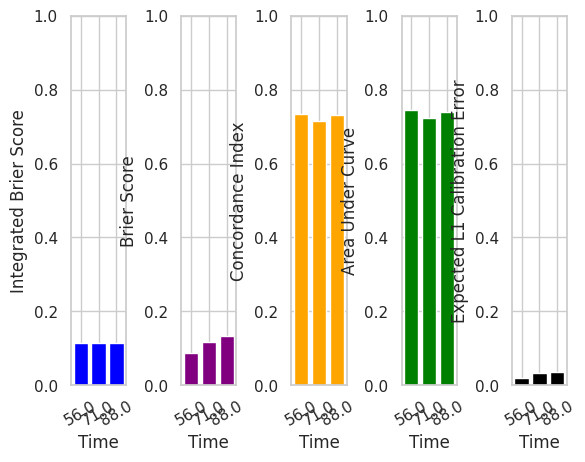

[0.74508969 0.72365279 0.73850807]
[np.float64(0.7332840589548513), np.float64(0.7159940496361104), np.float64(0.7303775826442643)]
[0.01874829 0.03315146 0.03629155]


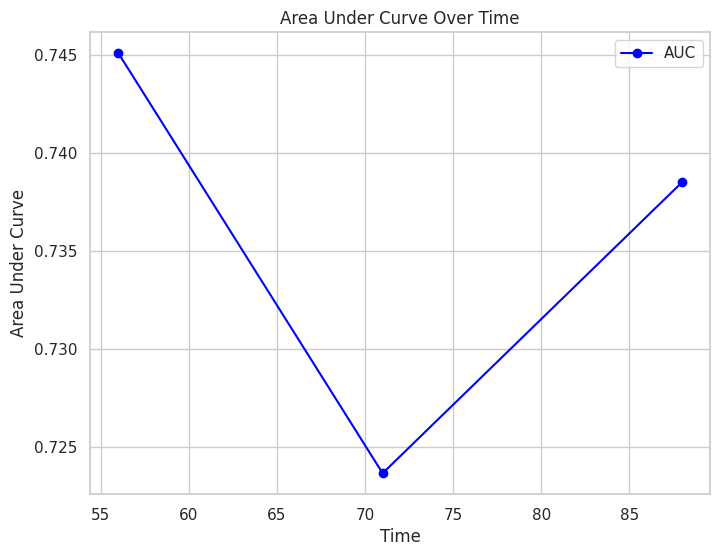

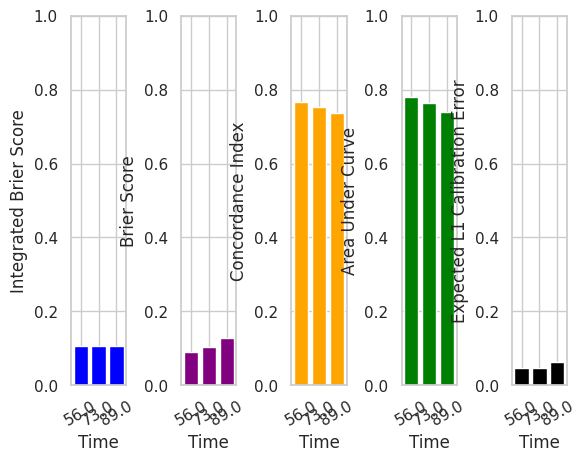

[0.77995676 0.76369381 0.73921521]
[np.float64(0.7660127872458953), np.float64(0.7534405974440148), np.float64(0.7360271187728507)]
[0.04647833 0.04743951 0.06188562]


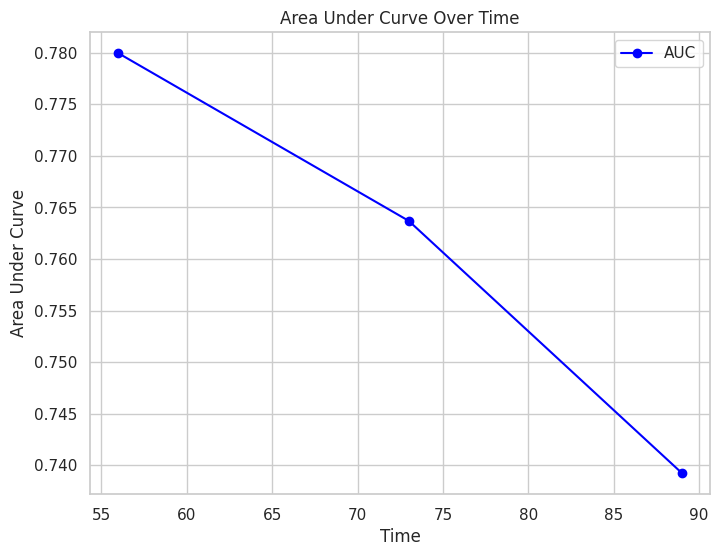

In [ ]:
cph_predictions_te = cph_model.predict_survival(x_te.astype(np.float64), times)
cph_results = dict()
cph_results['Integrated Brier Score'] = survival_regression_metric('ibs', outcomes=y_te, predictions=cph_predictions_te,times=times, outcomes_train=y_tr)
cph_results['Brier Score'] = survival_regression_metric('brs', outcomes=y_te, predictions=cph_predictions_te,times=times, outcomes_train=y_tr)
cph_results['Concordance Index'] = survival_regression_metric('ctd', outcomes=y_te, predictions=cph_predictions_te,times=times, outcomes_train=y_tr)
cph_results['Area Under Curve'] = survival_regression_metric('auc', outcomes=y_te, predictions=cph_predictions_te,times=times, outcomes_train=y_tr)
cph_results['Expected L1 Calibration Error'] = np.array(list(survival_regression_metric('ece', outcomes=y_te, predictions=cph_predictions_te, times=times, outcomes_train=y_tr).values()))

plot_performance_metrics(cph_results, times)
print_performance_metrics(cph_results['Area Under Curve'])
print_performance_metrics(cph_results['Concordance Index'])
print_performance_metrics(cph_results['Expected L1 Calibration Error'])
plot_auc(cph_results['Area Under Curve'], times)

cph_non_white_predictions_te = cph_non_white_model.predict_survival(x_te_non_white.astype(np.float64), y_te_non_white_times)
cph_non_white_results = dict()
cph_non_white_results['Integrated Brier Score'] = survival_regression_metric('ibs', outcomes=y_te_non_white, predictions=cph_non_white_predictions_te,times=y_te_non_white_times, outcomes_train=y_tr_non_white)
cph_non_white_results['Brier Score'] = survival_regression_metric('brs', outcomes=y_te_non_white, predictions=cph_non_white_predictions_te,times=y_te_non_white_times, outcomes_train=y_tr_non_white)
cph_non_white_results['Concordance Index'] = survival_regression_metric('ctd', outcomes=y_te_non_white, predictions=cph_non_white_predictions_te,times=y_te_non_white_times, outcomes_train=y_tr_non_white)
cph_non_white_results['Area Under Curve'] = survival_regression_metric('auc', outcomes=y_te_non_white, predictions=cph_non_white_predictions_te,times=y_te_non_white_times, outcomes_train=y_tr_non_white)
cph_non_white_results['Expected L1 Calibration Error'] = np.array([survival_regression_metric('ece', outcomes=y_te_non_white, predictions=cph_non_white_predictions_te, times=times, outcomes_train=y_tr_non_white)[t] for t in times])

plot_performance_metrics(cph_non_white_results, y_te_non_white_times)
print_performance_metrics(cph_non_white_results['Area Under Curve'])
print_performance_metrics(cph_non_white_results['Concordance Index'])
print_performance_metrics(cph_non_white_results['Expected L1 Calibration Error'])
plot_auc(cph_non_white_results['Area Under Curve'], y_te_non_white_times)

/content/revisit-deepcoxmixtures-cs598-uiuc/auton_survival/estimators.py:206: FutureWarning: DataFrame.interpolate with method=bfill is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  return survival_predictions.sort_index(axis=0).interpolate().interpolate(method='bfill').T[times].values


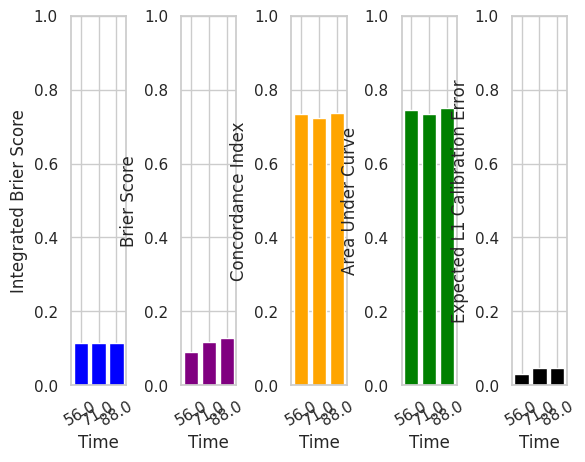

[0.74386349 0.73490362 0.74978511]
[np.float64(0.7339298758788074), np.float64(0.7231204897670953), np.float64(0.7355808775982448)]
[0.03059143 0.04598589 0.04779574]


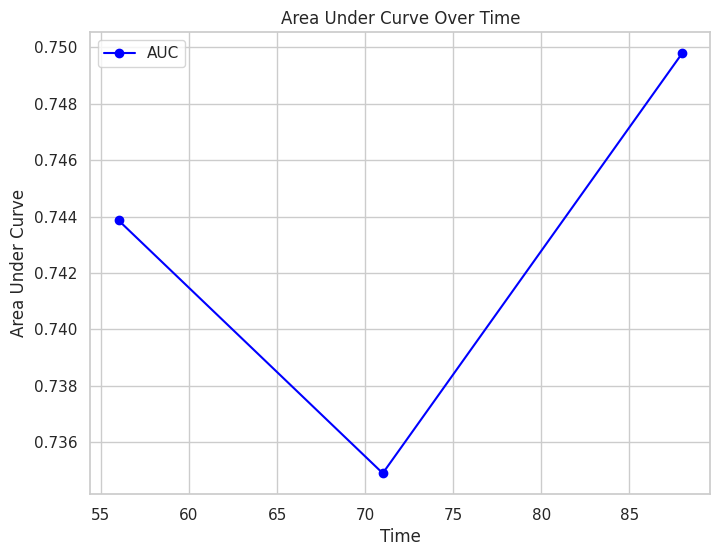

/content/revisit-deepcoxmixtures-cs598-uiuc/auton_survival/estimators.py:206: FutureWarning: DataFrame.interpolate with method=bfill is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  return survival_predictions.sort_index(axis=0).interpolate().interpolate(method='bfill').T[times].values


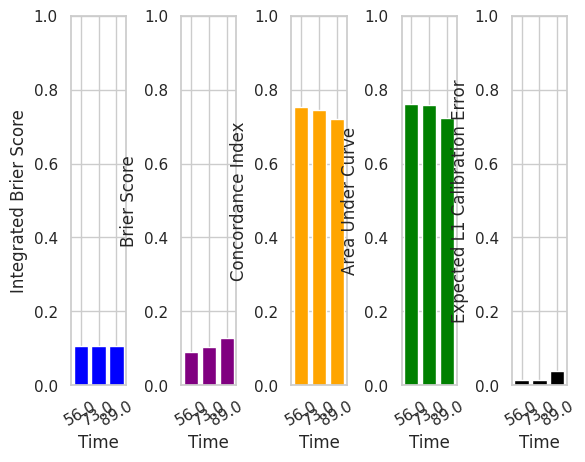

[0.76051305 0.75915072 0.72265499]
[np.float64(0.7516868460755981), np.float64(0.7448061145443797), np.float64(0.7216332206434456)]
[0.01342323 0.01511636 0.03867448]


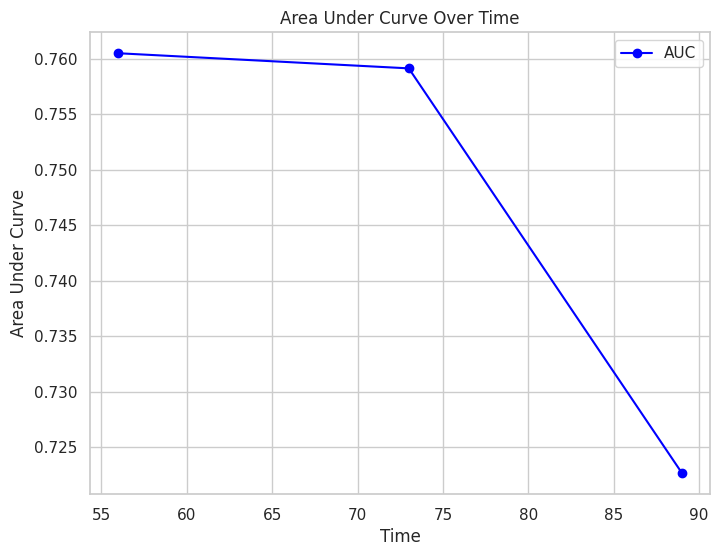

/content/revisit-deepcoxmixtures-cs598-uiuc/auton_survival/estimators.py:206: FutureWarning: DataFrame.interpolate with method=bfill is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  return survival_predictions.sort_index(axis=0).interpolate().interpolate(method='bfill').T[times].values


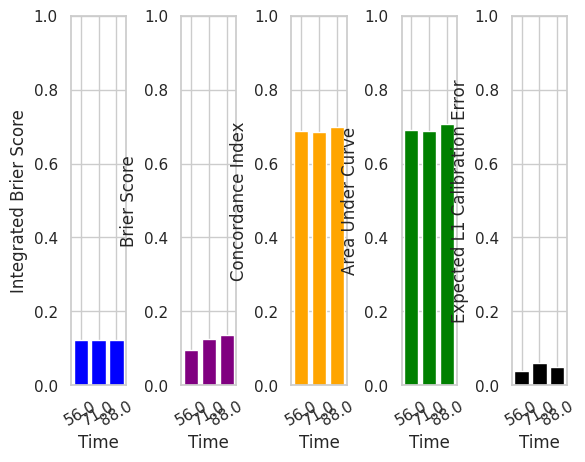

[0.69014451 0.6885956  0.70590113]
[np.float64(0.687399637102768), np.float64(0.6861959995960373), np.float64(0.7002075709484155)]
[0.03876591 0.05998042 0.04943079]


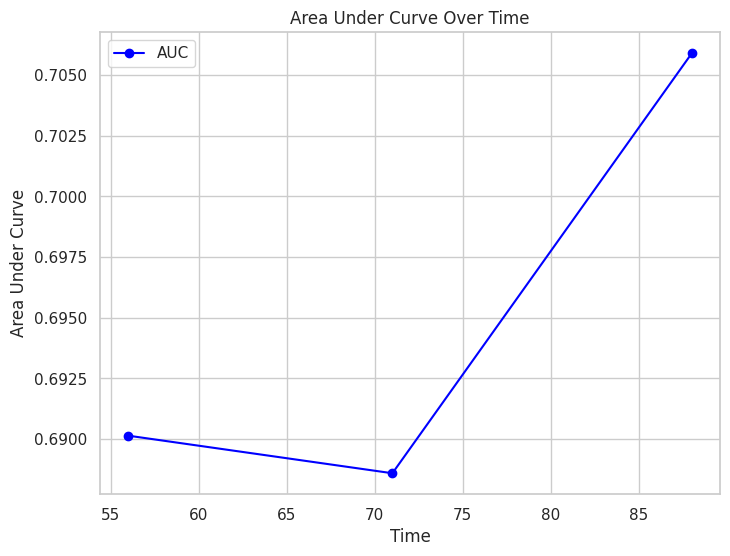

/content/revisit-deepcoxmixtures-cs598-uiuc/auton_survival/estimators.py:206: FutureWarning: DataFrame.interpolate with method=bfill is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  return survival_predictions.sort_index(axis=0).interpolate().interpolate(method='bfill').T[times].values


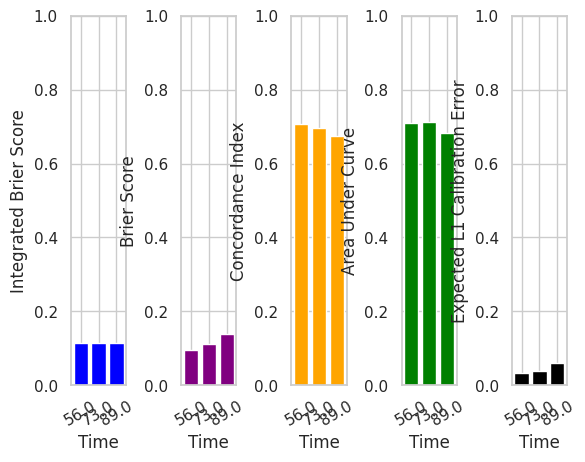

[0.71059644 0.71156309 0.68198591]
[np.float64(0.7066060864279753), np.float64(0.6973472774306635), np.float64(0.6756687169682362)]
[0.03366444 0.03804161 0.06063037]


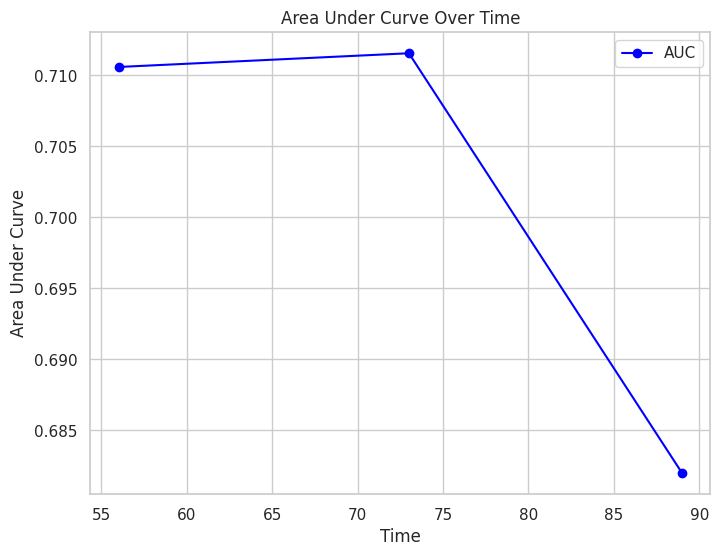

In [ ]:
dcm_predictions_te = dcm_model.predict_survival(x_te.astype(np.float64), times)
dcm_results = dict()
dcm_results['Integrated Brier Score'] = survival_regression_metric('ibs', outcomes=y_te, predictions=dcm_predictions_te,times=times, outcomes_train=y_tr)
dcm_results['Brier Score'] = survival_regression_metric('brs', outcomes=y_te, predictions=dcm_predictions_te,times=times, outcomes_train=y_tr)
dcm_results['Concordance Index'] = survival_regression_metric('ctd', outcomes=y_te, predictions=dcm_predictions_te,times=times, outcomes_train=y_tr)
dcm_results['Area Under Curve'] = survival_regression_metric('auc', outcomes=y_te, predictions=dcm_predictions_te,times=times, outcomes_train=y_tr)
dcm_results['Expected L1 Calibration Error'] = np.array(list(survival_regression_metric('ece', outcomes=y_te, predictions=dcm_predictions_te, times=times, outcomes_train=y_tr).values()))

plot_performance_metrics(dcm_results, times)
print_performance_metrics(dcm_results['Area Under Curve'])
print_performance_metrics(dcm_results['Concordance Index'])
print_performance_metrics(dcm_results['Expected L1 Calibration Error'])
plot_auc(dcm_results['Area Under Curve'], times)

dcm_non_white_predictions_te = dcm_non_white_model.predict_survival(x_te_non_white.astype(np.float64), y_te_non_white_times)
dcm_non_white_results = dict()
dcm_non_white_results['Integrated Brier Score'] = survival_regression_metric('ibs', outcomes=y_te_non_white, predictions=dcm_non_white_predictions_te,times=y_te_non_white_times, outcomes_train=y_tr_non_white)
dcm_non_white_results['Brier Score'] = survival_regression_metric('brs', outcomes=y_te_non_white, predictions=dcm_non_white_predictions_te,times=y_te_non_white_times, outcomes_train=y_tr_non_white)
dcm_non_white_results['Concordance Index'] = survival_regression_metric('ctd', outcomes=y_te_non_white, predictions=dcm_non_white_predictions_te,times=y_te_non_white_times, outcomes_train=y_tr_non_white)
dcm_non_white_results['Area Under Curve'] = survival_regression_metric('auc', outcomes=y_te_non_white, predictions=dcm_non_white_predictions_te,times=y_te_non_white_times, outcomes_train=y_tr_non_white)
dcm_non_white_results['Expected L1 Calibration Error'] = np.array(list( survival_regression_metric('ece', outcomes=y_te_non_white, predictions=dcm_non_white_predictions_te,times=times, outcomes_train=y_tr_non_white).values() ))

plot_performance_metrics(dcm_non_white_results, y_te_non_white_times)
print_performance_metrics(dcm_non_white_results['Area Under Curve'])
print_performance_metrics(dcm_non_white_results['Concordance Index'])
print_performance_metrics(dcm_non_white_results['Expected L1 Calibration Error'])
plot_auc(dcm_non_white_results['Area Under Curve'], y_te_non_white_times)


dsm_predictions_te = dsm_model.predict_survival(x_te.astype(np.float64), times)
dsm_results = dict()
dsm_results['Integrated Brier Score'] = survival_regression_metric('ibs', outcomes=y_te, predictions=dsm_predictions_te,times=times, outcomes_train=y_tr)
dsm_results['Brier Score'] = survival_regression_metric('brs', outcomes=y_te, predictions=dsm_predictions_te,times=times, outcomes_train=y_tr)
dsm_results['Concordance Index'] = survival_regression_metric('ctd', outcomes=y_te, predictions=dsm_predictions_te,times=times, outcomes_train=y_tr)
dsm_results['Area Under Curve'] = survival_regression_metric('auc', outcomes=y_te, predictions=dsm_predictions_te,times=times, outcomes_train=y_tr)
dsm_results['Expected L1 Calibration Error'] = np.array(list( survival_regression_metric('ece', outcomes=y_te, predictions=dsm_predictions_te,times=times, outcomes_train=y_tr).values() ))

plot_performance_metrics(dsm_results, times)
print_performance_metrics(dsm_results['Area Under Curve'])
print_performance_metrics(dsm_results['Concordance Index'])
print_performance_metrics(dsm_results['Expected L1 Calibration Error'])
plot_auc(dsm_results['Area Under Curve'], times)

dsm_non_white_predictions_te = dsm_non_white_model.predict_survival(x_te_non_white.astype(np.float64), y_te_non_white_times)
dsm_non_white_results = dict()
dsm_non_white_results['Integrated Brier Score'] = survival_regression_metric('ibs', outcomes=y_te_non_white, predictions=dsm_non_white_predictions_te,times=y_te_non_white_times, outcomes_train=y_tr_non_white)
dsm_non_white_results['Brier Score'] = survival_regression_metric('brs', outcomes=y_te_non_white, predictions=dsm_non_white_predictions_te,times=y_te_non_white_times, outcomes_train=y_tr_non_white)
dsm_non_white_results['Concordance Index'] = survival_regression_metric('ctd', outcomes=y_te_non_white, predictions=dsm_non_white_predictions_te,times=y_te_non_white_times, outcomes_train=y_tr_non_white)
dsm_non_white_results['Area Under Curve'] = survival_regression_metric('auc', outcomes=y_te_non_white, predictions=dsm_non_white_predictions_te,times=y_te_non_white_times, outcomes_train=y_tr_non_white)
dsm_non_white_results['Expected L1 Calibration Error'] = np.array(list( survival_regression_metric('ece', outcomes=y_te_non_white, predictions=dsm_non_white_predictions_te,times=times, outcomes_train=y_tr_non_white) .values() ))

plot_performance_metrics(dsm_non_white_results, y_te_non_white_times)
print_performance_metrics(dsm_non_white_results['Area Under Curve'])
print_performance_metrics(dsm_non_white_results['Concordance Index'])
print_performance_metrics(dsm_non_white_results['Expected L1 Calibration Error'])
plot_auc(dsm_non_white_results['Area Under Curve'], y_te_non_white_times)



/content/revisit-deepcoxmixtures-cs598-uiuc/auton_survival/estimators.py:206: FutureWarning: DataFrame.interpolate with method=bfill is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  return survival_predictions.sort_index(axis=0).interpolate().interpolate(method='bfill').T[times].values


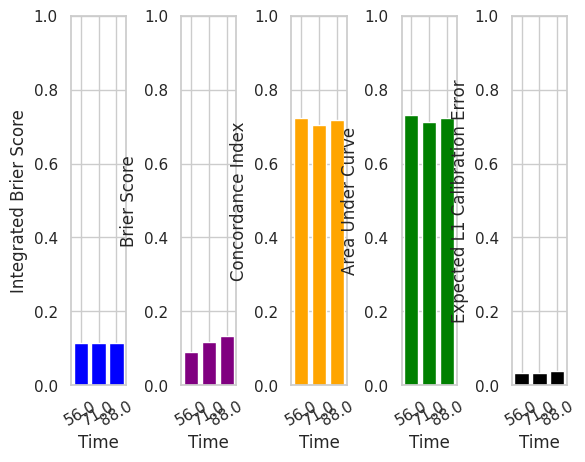

[0.7319206  0.71163576 0.72237255]
[np.float64(0.7233808710092514), np.float64(0.7050459164549869), np.float64(0.7183461493416238)]
[0.03249923 0.03334467 0.03997228]


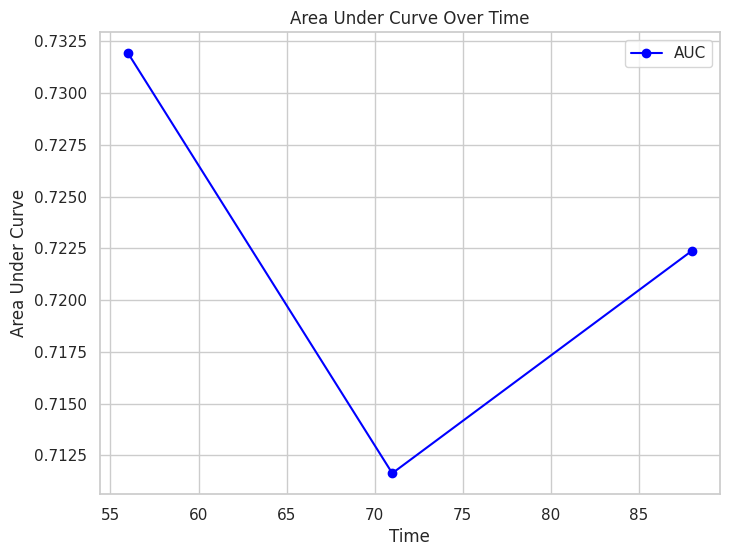

/content/revisit-deepcoxmixtures-cs598-uiuc/auton_survival/estimators.py:206: FutureWarning: DataFrame.interpolate with method=bfill is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  return survival_predictions.sort_index(axis=0).interpolate().interpolate(method='bfill').T[times].values


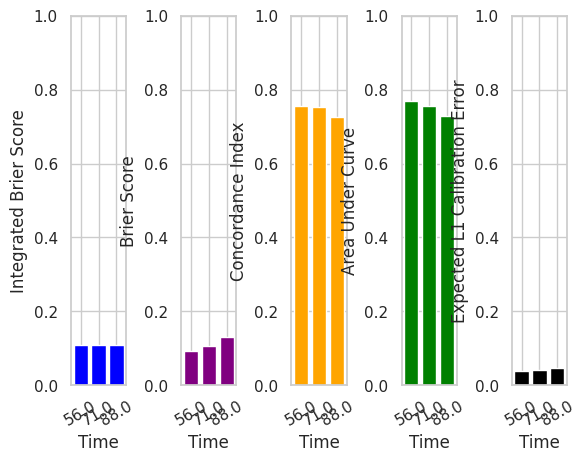

[0.7705195  0.75479828 0.72766991]
[np.float64(0.755529777026027), np.float64(0.7517869706637207), np.float64(0.7262397643599025)]
[0.04006825 0.0427417  0.04676483]


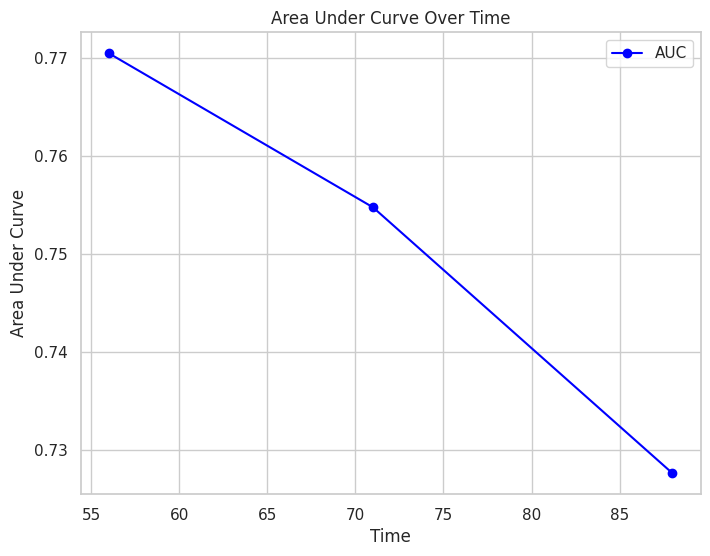

In [ ]:
#times = np.quantile(y_tr.time[y_tr.event==1], [0.25, 0.5, 0.75]).tolist()
rsf_predictions_te = rsf_model.predict_survival(x_te.astype(np.float64), times)
rsf_results = dict()
rsf_results['Integrated Brier Score'] = survival_regression_metric('ibs', outcomes=y_te, predictions=rsf_predictions_te,times=times, outcomes_train=y_tr)
rsf_results['Brier Score'] = survival_regression_metric('brs', outcomes=y_te, predictions=rsf_predictions_te,times=times, outcomes_train=y_tr)
rsf_results['Concordance Index'] = survival_regression_metric('ctd', outcomes=y_te, predictions=rsf_predictions_te,times=times, outcomes_train=y_tr)
rsf_results['Area Under Curve'] = survival_regression_metric('auc', outcomes=y_te, predictions=rsf_predictions_te,times=times, outcomes_train=y_tr)
rsf_results['Expected L1 Calibration Error'] = np.array(list( survival_regression_metric('ece', outcomes=y_te, predictions=rsf_predictions_te,times=times, outcomes_train=y_tr).values() ))

plot_performance_metrics(rsf_results, times)
print_performance_metrics(rsf_results['Area Under Curve'])
print_performance_metrics(rsf_results['Concordance Index'])
print_performance_metrics(rsf_results['Expected L1 Calibration Error'])
plot_auc(rsf_results['Area Under Curve'], times)

#times = np.quantile(y_tr_non_white.time[y_tr_non_white.event==1], [0.25, 0.5, 0.75]).tolist()
rsf_non_white_predictions_te = rsf_non_white_model.predict_survival(x_te_non_white.astype(np.float64), times)
rsf_non_white_results = dict()
rsf_non_white_results['Integrated Brier Score'] = survival_regression_metric('ibs', outcomes=y_te_non_white, predictions=rsf_non_white_predictions_te,times=times, outcomes_train=y_tr_non_white)
rsf_non_white_results['Brier Score'] = survival_regression_metric('brs', outcomes=y_te_non_white, predictions=rsf_non_white_predictions_te,times=times, outcomes_train=y_tr_non_white)
rsf_non_white_results['Concordance Index'] = survival_regression_metric('ctd', outcomes=y_te_non_white, predictions=rsf_non_white_predictions_te,times=times, outcomes_train=y_tr_non_white)
rsf_non_white_results['Area Under Curve'] = survival_regression_metric('auc', outcomes=y_te_non_white, predictions=rsf_non_white_predictions_te,times=times, outcomes_train=y_tr_non_white)
rsf_non_white_results['Expected L1 Calibration Error'] = np.array(list( survival_regression_metric('ece', outcomes=y_te_non_white, predictions=rsf_non_white_predictions_te,times=times, outcomes_train=y_tr_non_white).values() ))

plot_performance_metrics(rsf_non_white_results, times)
print_performance_metrics(rsf_non_white_results['Area Under Curve'])
print_performance_metrics(rsf_non_white_results['Concordance Index'])
print_performance_metrics(rsf_non_white_results['Expected L1 Calibration Error'])
plot_auc(rsf_non_white_results['Area Under Curve'], times)


In [ ]:
# Create a dictionary to store all results
results_summary = {
    'Model': ['CPH', 'CPH (Non-White)', 'DCM', 'DCM (Non-White)',
              'DSM', 'DSM (Non-White)', 'RSF', 'RSF (Non-White)'],
    'AUC': [
        cph_results['Area Under Curve'],
        cph_non_white_results['Area Under Curve'],
        dcm_results['Area Under Curve'],
        dcm_non_white_results['Area Under Curve'],
        dsm_results['Area Under Curve'],
        dsm_non_white_results['Area Under Curve'],
        rsf_results['Area Under Curve'],
        rsf_non_white_results['Area Under Curve']
    ],
    'CTD': [
        cph_results['Concordance Index'],
        cph_non_white_results['Concordance Index'],
        dcm_results['Concordance Index'],
        dcm_non_white_results['Concordance Index'],
        dsm_results['Concordance Index'],
        dsm_non_white_results['Concordance Index'],
        rsf_results['Concordance Index'],
        rsf_non_white_results['Concordance Index']
    ],
    'ECE': [
        cph_results['Expected L1 Calibration Error'],
        cph_non_white_results['Expected L1 Calibration Error'],
        dcm_results['Expected L1 Calibration Error'],
        dcm_non_white_results['Expected L1 Calibration Error'],
        dsm_results['Expected L1 Calibration Error'],
        dsm_non_white_results['Expected L1 Calibration Error'],
        rsf_results['Expected L1 Calibration Error'],
        rsf_non_white_results['Expected L1 Calibration Error']
    ],
    'Brier': [
        cph_results.get('Brier Score', np.nan),
        cph_non_white_results.get('Brier Score', np.nan),
        dcm_results.get('Brier Score', np.nan),
        dcm_non_white_results.get('Brier Score', np.nan),
        dsm_results.get('Brier Score', np.nan),
        dsm_non_white_results.get('Brier Score', np.nan),
        rsf_results.get('Brier Score', np.nan),
        rsf_non_white_results.get('Brier Score', np.nan)
    ],
    'IBS': [
        cph_results.get('Integrated Brier Score', np.nan),
        cph_non_white_results.get('Integrated Brier Score', np.nan),
        dcm_results.get('Integrated Brier Score', np.nan),
        dcm_non_white_results.get('Integrated Brier Score', np.nan),
        dsm_results.get('Integrated Brier Score', np.nan),
        dsm_non_white_results.get('Integrated Brier Score', np.nan),
        rsf_results.get('Integrated Brier Score', np.nan),
        rsf_non_white_results.get('Integrated Brier Score', np.nan)
    ]
}

# Convert to DataFrame
results_df = pd.DataFrame(results_summary)

# Save to text file
with open('model_performance_results.txt', 'w') as f:
    f.write("Model Performance Results\n")
    f.write("=======================\n\n")
    f.write(results_df.to_string(index=False))

    # Add time quantiles information if available
    try:
        times = np.quantile(y_tr.time[y_tr.event==1], [0.25, 0.5, 0.75]).tolist()
        f.write("\n\nTime Quantiles for Evaluation:\n")
        f.write(f"25th percentile: {times[0]:.2f}\n")
        f.write(f"50th percentile (median): {times[1]:.2f}\n")
        f.write(f"75th percentile: {times[2]:.2f}\n")
    except:
        pass

print("Results saved to 'model_performance_results.txt'")

Results saved to 'model_performance_results.txt'


{'Model': ['CPH', 'CPH (Non-White)', 'DCM', 'DCM (Non-White)', 'DSM', 'DSM (Non-White)', 'RSF', 'RSF (Non-White)'], 'AUC': [array([0.74508969, 0.72365279, 0.73850807]), array([0.77995676, 0.76369381, 0.73921521]), array([0.74386349, 0.73490362, 0.74978511]), array([0.76051305, 0.75915072, 0.72265499]), array([0.69014451, 0.6885956 , 0.70590113]), array([0.71059644, 0.71156309, 0.68198591]), array([0.7319206 , 0.71163576, 0.72237255]), array([0.7705195 , 0.75479828, 0.72766991])], 'CTD': [[np.float64(0.7332840589548513), np.float64(0.7159940496361104), np.float64(0.7303775826442643)], [np.float64(0.7660127872458953), np.float64(0.7534405974440148), np.float64(0.7360271187728507)], [np.float64(0.7339298758788074), np.float64(0.7231204897670953), np.float64(0.7355808775982448)], [np.float64(0.7516868460755981), np.float64(0.7448061145443797), np.float64(0.7216332206434456)], [np.float64(0.687399637102768), np.float64(0.6861959995960373), np.float64(0.7002075709484155)], [np.float64(0.7066

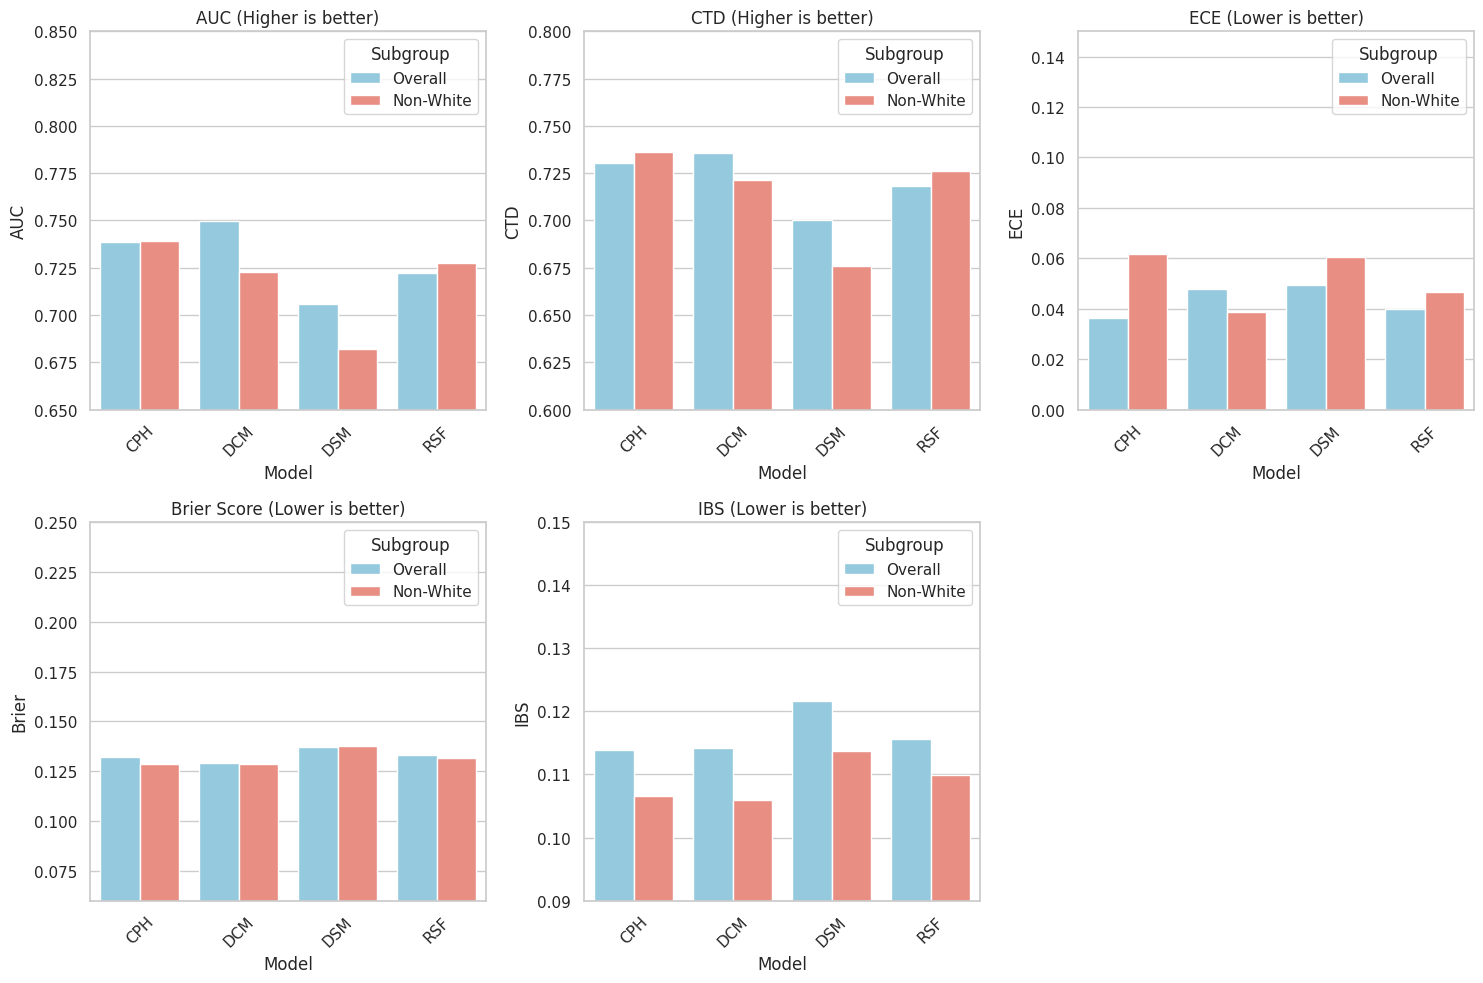

In [ ]:
print(results_summary)
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Convert results_summary to a DataFrame
data = {
    'Model': ['CPH', 'CPH (Non-White)', 'DCM', 'DCM (Non-White)', 'DSM', 'DSM (Non-White)', 'RSF', 'RSF (Non-White)'],
    'AUC': [x[2] for x in results_summary['AUC']],  # Use the 3rd value (index 2)
    'CTD': [x[2] for x in results_summary['CTD']],  # Use the 3rd value (index 2)
    'ECE': [x[2] for x in results_summary['ECE']],  # Use the 3rd value (index 2)
    'Brier': [x[2] for x in results_summary['Brier']],  # Use the 3rd value (index 2)
    'IBS': results_summary['IBS']  # IBS remains unchanged (single value per model)
}

df = pd.DataFrame(data)

# Create Subgroup column
df['Subgroup'] = df['Model'].apply(lambda x: 'Non-White' if '(Non-White)' in x else 'Overall')

# Clean Model names (remove " (Non-White)" suffix)
df['Model'] = df['Model'].apply(lambda x: x.split(' (')[0])

# Plotting
plt.figure(figsize=(15, 10))
sns.set_theme(style="whitegrid")

# AUC (using array[2])
plt.subplot(2, 3, 1)
sns.barplot(data=df, x='Model', y='AUC', hue='Subgroup',
            palette={'Overall': 'skyblue', 'Non-White': 'salmon'})
plt.title('AUC (Higher is better)')
plt.xticks(rotation=45)
plt.ylim(0.65, 0.85)

# CTD (using array[2])
plt.subplot(2, 3, 2)
sns.barplot(data=df, x='Model', y='CTD', hue='Subgroup',
            palette={'Overall': 'skyblue', 'Non-White': 'salmon'})
plt.title('CTD (Higher is better)')
plt.xticks(rotation=45)
plt.ylim(0.6, 0.8)

# ECE (using array[2])
plt.subplot(2, 3, 3)
sns.barplot(data=df, x='Model', y='ECE', hue='Subgroup',
            palette={'Overall': 'skyblue', 'Non-White': 'salmon'})
plt.title('ECE (Lower is better)')
plt.xticks(rotation=45)
plt.ylim(0, 0.15)

# Brier (using array[2])
plt.subplot(2, 3, 4)
sns.barplot(data=df, x='Model', y='Brier', hue='Subgroup',
            palette={'Overall': 'skyblue', 'Non-White': 'salmon'})
plt.title('Brier Score (Lower is better)')
plt.xticks(rotation=45)
plt.ylim(0.06, 0.25)

# IBS (unchanged)
plt.subplot(2, 3, 5)
sns.barplot(data=df, x='Model', y='IBS', hue='Subgroup',
            palette={'Overall': 'skyblue', 'Non-White': 'salmon'})
plt.title('IBS (Lower is better)')
plt.xticks(rotation=45)
plt.ylim(0.09, 0.15)

plt.tight_layout()
plt.show()

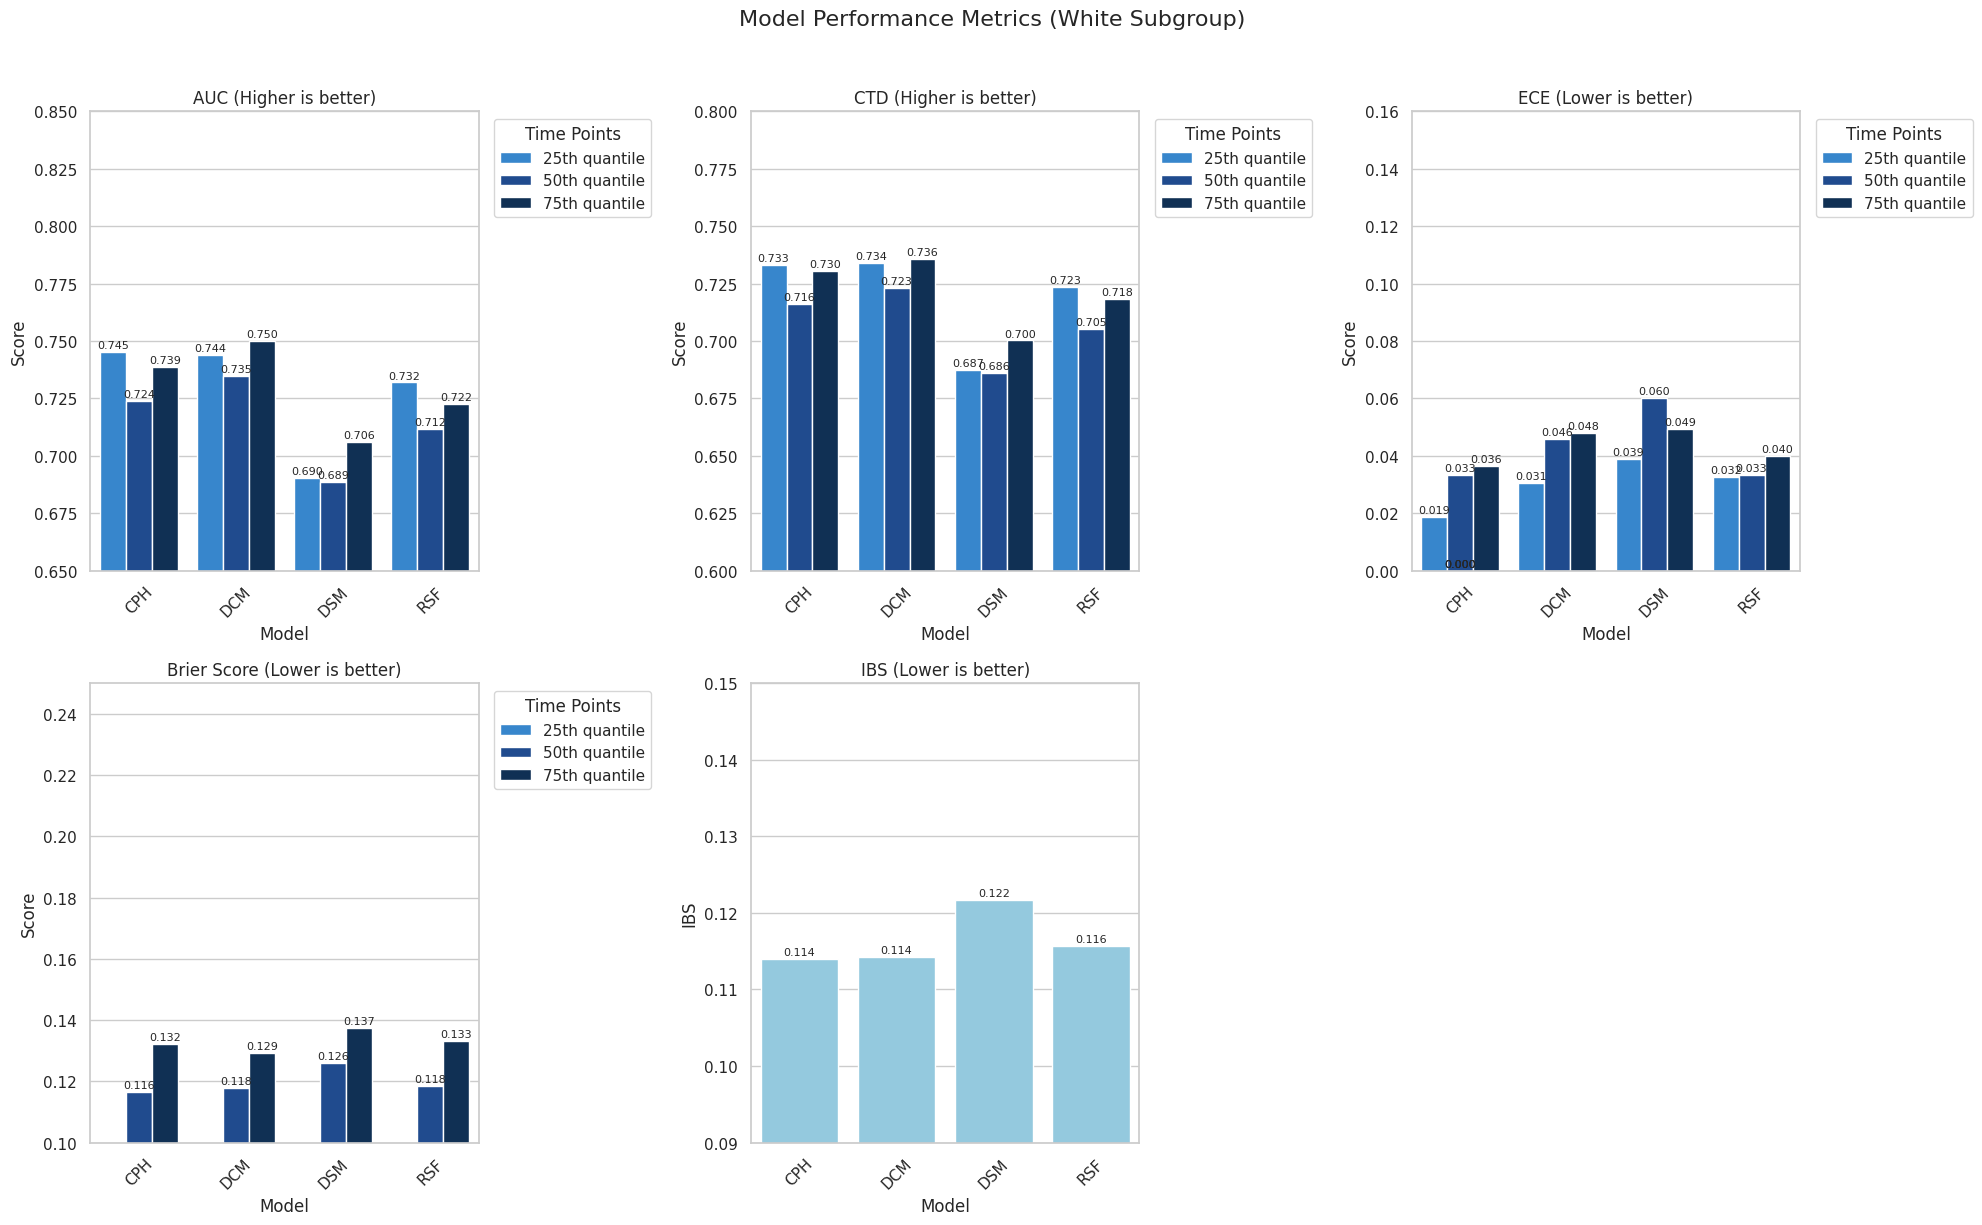

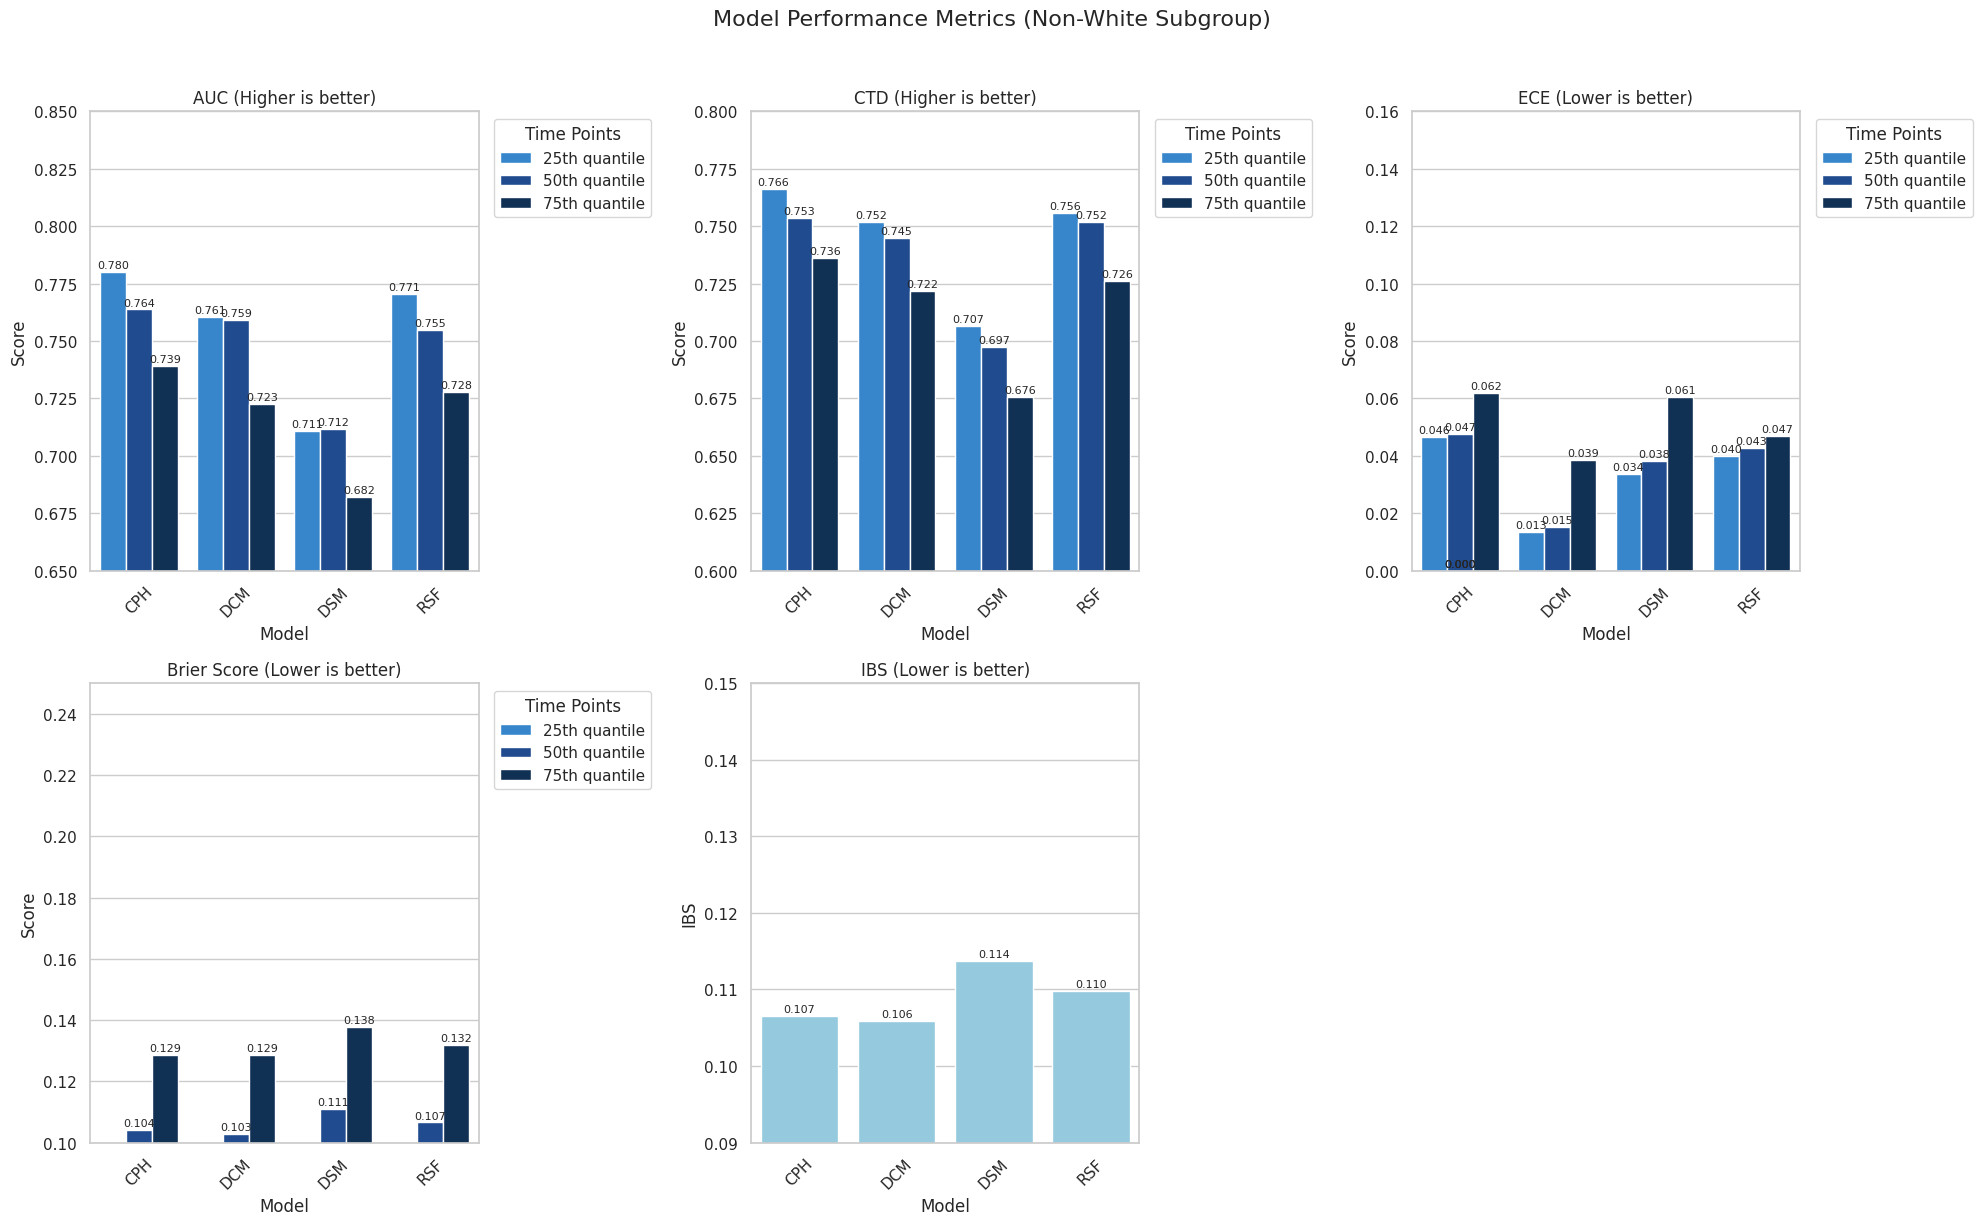

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Convert results_summary to a DataFrame with all time points
data = {
    'Model': ['CPH', 'CPH (Non-White)', 'DCM', 'DCM (Non-White)', 'DSM', 'DSM (Non-White)', 'RSF', 'RSF (Non-White)'],
    'AUC_t0': [x[0] for x in results_summary['AUC']],
    'AUC_t1': [x[1] for x in results_summary['AUC']],
    'AUC_t2': [x[2] for x in results_summary['AUC']],
    'CTD_t0': [x[0] for x in results_summary['CTD']],
    'CTD_t1': [x[1] for x in results_summary['CTD']],
    'CTD_t2': [x[2] for x in results_summary['CTD']],
    'ECE_t0': [x[0] for x in results_summary['ECE']],
    'ECE_t1': [x[1] for x in results_summary['ECE']],
    'ECE_t2': [x[2] for x in results_summary['ECE']],
    'Brier_t0': [x[0] for x in results_summary['Brier']],
    'Brier_t1': [x[1] for x in results_summary['Brier']],
    'Brier_t2': [x[2] for x in results_summary['Brier']],
    'IBS': results_summary['IBS']  # IBS remains unchanged (single value per model)
}

df = pd.DataFrame(data)

# Create Subgroup column
df['Subgroup'] = df['Model'].apply(lambda x: 'Non-White' if '(Non-White)' in x else 'White')

# Clean Model names (remove " (Non-White)" suffix)
df['Model'] = df['Model'].apply(lambda x: x.split(' (')[0])

# Melt the DataFrame for time-point analysis
df_melted = pd.melt(
    df,
    id_vars=['Model', 'Subgroup', 'IBS'],
    value_vars=['AUC_t0', 'AUC_t1', 'AUC_t2', 'CTD_t0', 'CTD_t1', 'CTD_t2',
                'ECE_t0', 'ECE_t1', 'ECE_t2', 'Brier_t0', 'Brier_t1', 'Brier_t2'],
    var_name='Metric_Time',
    value_name='Value'
)

# Split Metric_Time into Metric and Time
df_melted[['Metric', 'Time']] = df_melted['Metric_Time'].str.split('_', expand=True)
df_melted['Time'] = df_melted['Time'].str.replace('t', '').astype(int)

# Define metrics and their properties
metrics = {
    'AUC': {'title': 'AUC (Higher is better)', 'ylim': (0.65, 0.85)},
    'CTD': {'title': 'CTD (Higher is better)', 'ylim': (0.6, 0.8)},
    'ECE': {'title': 'ECE (Lower is better)', 'ylim': (0, 0.16)},
    'Brier': {'title': 'Brier Score (Lower is better)', 'ylim': (0.1, 0.25)},
    'IBS': {'title': 'IBS (Lower is better)', 'ylim': (0.09, 0.15)}
}

# Custom palette and legend labels
time_palette = ["#1E88E5", "#0D47A1", "#052F5F"]  # Dark blue to very dark blue (t0 → t2)
time_labels = ['25th quantile', '50th quantile', '75th quantile']  # New legend labels

# Create separate plots for White and Non-White subgroups
for subgroup in ['White', 'Non-White']:
    plt.figure(figsize=(20, 12))
    sns.set_theme(style="whitegrid")
    plt.suptitle(f'Model Performance Metrics ({subgroup} Subgroup)', y=1.02, fontsize=16)

    # Plot each metric in a separate subplot
    for i, (metric, props) in enumerate(metrics.items(), 1):
        plt.subplot(2, 3, i)
        if metric != 'IBS':
            ax = sns.barplot(
                data=df_melted[(df_melted['Metric'] == metric) & (df_melted['Subgroup'] == subgroup)],
                x='Model', y='Value', hue='Time',
                palette=time_palette,
                hue_order=[0, 1, 2],  # Ensure consistent ordering
                order=['CPH', 'DCM', 'DSM', 'RSF'],
                errorbar=None
            )
            plt.title(props['title'])
            plt.ylim(props['ylim'])
            plt.xticks(rotation=45)
            plt.xlabel('Model')
            plt.ylabel('Score')

            # Update legend with quantile labels
            handles, _ = ax.get_legend_handles_labels()
            ax.legend(handles, time_labels, title='Time Points', bbox_to_anchor=(1.02, 1), loc='upper left')

            # Add value annotations on top of bars
            for p in ax.patches:
                ax.annotate(f"{p.get_height():.3f}",
                           (p.get_x() + p.get_width() / 2., p.get_height()),
                           ha='center', va='center', xytext=(0, 5),
                           textcoords='offset points', fontsize=8)
        else:
            # IBS (single value per model)
            ax = sns.barplot(
                data=df[df['Subgroup'] == subgroup],
                x='Model', y='IBS',
                color='skyblue',
                order=['CPH', 'DCM', 'DSM', 'RSF'],
                errorbar=None
            )
            plt.title(props['title'])
            plt.ylim(props['ylim'])
            plt.xticks(rotation=45)

            # Add value annotations on top of bars
            for p in ax.patches:
                ax.annotate(f"{p.get_height():.3f}",
                           (p.get_x() + p.get_width() / 2., p.get_height()),
                           ha='center', va='center', xytext=(0, 5),
                           textcoords='offset points', fontsize=8)

    plt.tight_layout()
    plt.show()